# APU: Analitical Propagation Uncertainty - Deep Learning
The chosen dataset was the Airfoil Self-Noise Data Set (http://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise), taken from the UCI Machine Learning Repository. The selected predicted variable was "Pressure," and all other variables were considered as predictor variables.



In [2]:
#importação e tratamento dos dados 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install scikit-learn
%matplotlib inline
%reload_ext autoreload
%autoreload 2
df=pd.read_csv('airfoil.csv')
from sklearn.preprocessing import MinMaxScaler 
scaler=MinMaxScaler(feature_range=(0,1))
df_n = scaler.fit_transform(df)
df_n=pd.DataFrame(df_n)
y=df_n[5]
X=df_n[df_n.columns[0:5]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, shuffle=True, random_state=32)

# Rede Neural 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
import numpy as np

# Configurações básicas
input_dim = X_train.shape[1]
# Criando o modelo sequencial
model = Sequential()
# Adicionando a camada de entrada
model.add(Input(shape=(input_dim,)))
# Primeira camada oculta com dropout
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))  # Dropout de 50%
# Segunda camada oculta com dropout
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))  # Dropout de 50%
# Camada de saída
model.add(Dense(1))  # Uma unidade de saída para regressão
# Compilando o modelo
model.compile(optimizer=Adam(),
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

# Resumo do modelo
model.summary()

# Treinamento do modelo
model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

# Métricas para conjunto treino  
from sklearn import metrics
y_hat_train = model.predict(X_train)# passamos  o conjunto de treino pela rede e obtemos as predições 
y_hat_test = model.predict(X_test)# passamos  o conjunto de teste pela rede e obtemos as predições
MAE_T=metrics.mean_absolute_error(y_train, y_hat_train)
R2_T=metrics.r2_score(y_train, y_hat_train);
RMSE_T=metrics.mean_squared_error(y_train, y_hat_train)
MAE_T,R2_T,RMSE_T

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,801 (42.19 KB)

 Trainable params: 10,801 (42.19 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1647 - mean_absolute_error: 0.3322 - val_loss: 0.0266 - val_mean_absolute_error: 0.1356
Epoch 2/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0727 - mean_absolute_error: 0.2162 - val_loss: 0.0174 - val_mean_absolute_error: 0.1016
Epoch 3/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0484 - mean_absolute_error: 0.1790 - val_loss: 0.0155 - val_mean_absolute_error: 0.0961
Epoch 4/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0397 - mean_absolute_error: 0.1638 - val_loss: 0.0170 - val_mean_absolute_error: 0.1036
Epoch 5/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0327 - mean_absolute_error: 0.1461 - val_loss: 0.0133 - val_mean_absolute_error: 0.0874
Epoch 6/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0324 - mean_absolute_error: 0.1436 - val_loss: 0.0130 - val_mean_absolute_error: 0.0874
Epoch 7/200
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0293 - mean_absolute_error: 0.1375 - val_loss

(0.04729606574175483, 0.8889965615473208, 0.00376365002023859)

In [3]:
# Métricas para conjunto teste
MAE_t=metrics.mean_absolute_error(y_test, y_hat_test)
R2_t=metrics.r2_score(y_test, y_hat_test);
RMSE_t=metrics.mean_squared_error(y_test, y_hat_test)
MAE_t,R2_T,RMSE_T

(0.03990303084921225, 0.8889965615473208, 0.00376365002023859)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step


C:\Users\AdmPDI\AppData\Local\Temp\ipykernel_24716\1752583821.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.resume4=pd.concat([X,y,previsão],axis=1) #criando data frame com os valores do vetor x mais a coluna da previsão
C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


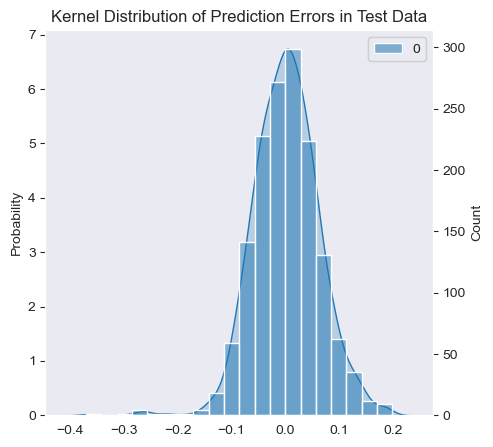

In [4]:
previsão=model.predict(X[:1503])# passando todos os dados pela rede (sem distinção de treino e teste)
previsão=pd.DataFrame(previsão)
df.resume4=pd.concat([X,y,previsão],axis=1) #criando data frame com os valores do vetor x mais a coluna da previsão 
df.resume4.columns=['x1','x2','x3','x4','x5','y','predict']
erro=df.resume4['predict']-df.resume4['y']#determinando o erro entre o real e a predição 
#erro sistemático 
SE=erro.loc[:,].mean()
#erro randômico
RE=erro.loc[:,].std()
erro=pd.DataFrame(erro) # passando para dataframe

# Histograma do erro randômico
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
bins = 20

# Criando o ambiente do gráfico 
sns.set_style("dark")
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# Insere curva KDE (Kernel Density Estimation)
g1 = sns.kdeplot(erro, ax=ax, fill=True)  # fill=True para preencher a área sob a curva
# Insere histograma
ax_copy = ax.twinx()
g2 = sns.histplot(erro, ax=ax_copy, bins=bins, kde=False)
# Ajusta rótulos
g1.set_ylabel("Probability")
g2.set_title("Kernel Distribution of Prediction Errors in Test Data")

plt.show()


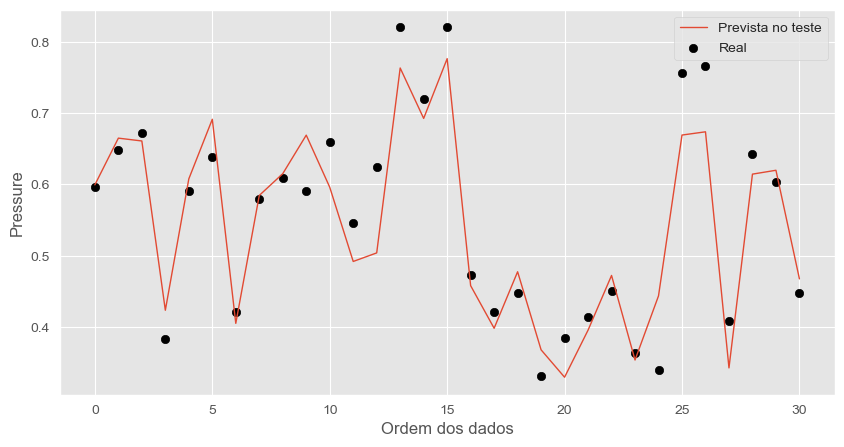

In [5]:
# avaliação conjunto de teste
n = 31
plt.style.use("ggplot")
f = plt.figure(figsize=(10,5))
plt.plot(range(n), y_hat_test, label="Prevista no teste", lw=1)#y_hat_test é a prediçã osobre os dados de teste
plt.scatter(range(n), y_test, color="black", label="Real")
plt.ylabel("Pressure")
plt.xlabel("Ordem dos dados")
plt.legend(loc="best")
f.savefig("rnn_demanda1.png")
plt.show()

C:\Users\AdmPDI\AppData\Local\Temp\ipykernel_24716\968056435.py:40: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.resume=pd.concat([y_test,mean,desvpad],axis=1)
C:\Users\AdmPDI\AppData\Local\Temp\ipykernel_24716\968056435.py:53: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g1 = sns.distplot(erro2, ax=ax,
C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  w

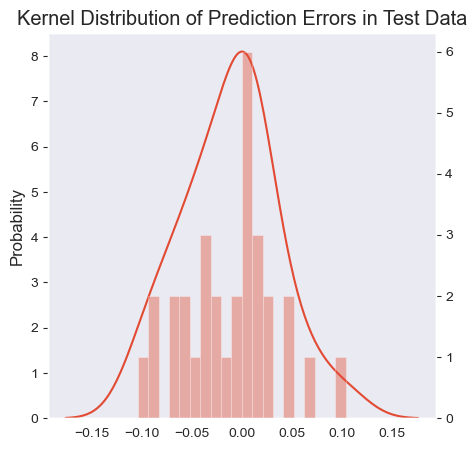

In [6]:
import tensorflow as tf
import numpy as np

# Definir a quantidade de amostras para Monte Carlo
T = 1000
# Função para previsão estocástica
@tf.function
def predict_stochastic(x):
    return model(x, training=True)
# Executar previsões Monte Carlo
y_hat_mc = np.array([predict_stochastic(X_test).numpy() for _ in range(T)])

# Redimensionar as previsões para a forma desejada
y_hat_mc = y_hat_mc.reshape(T, y_test.shape[0]).T
y_hat_mc=pd.DataFrame(y_hat_mc)
yhat=pd.DataFrame(y_hat_mc)

#vamos calcular a média dos 1000 resultados para cada amostra de teste
yhat['mean']=yhat.apply(np.mean,axis=1)

#separamos novamente os 1000 resultados retitrando a coluna média 
yhatd=yhat.iloc[:,0:1000]

#vamos calcular o desvio padrão dos 1000 resultados dos dados de teste
yhatd['std']=yhatd.apply(np.std,axis=1)

#Abaixo os valores reais para y do conjunto de teste
y_test=pd.DataFrame(y_test)

#resetando o índice 
y_test=y_test.reset_index(drop=True)

#retirado a coluna 0
mean=yhat.iloc[:,1000]
mean=pd.DataFrame(mean)
desvpad=yhatd.iloc[:,1000]
desvpad=pd.DataFrame(desvpad)

#colocar tudo em uma tabela
df.resume=pd.concat([y_test,mean,desvpad],axis=1)
erro2=df.resume['mean']-df.resume[5]
es2=erro2.loc[:,].mean()#erro sistemático do modelo
ea2=erro2.loc[:,].std() #erro aleatório do modelo 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
bins = 20
# Criando o ambiente do gráfico 
sns.set_style("dark")
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# Insere curva KDE (Kernel Density Estimation)
g1 = sns.distplot(erro2, ax=ax, 
                  kde=True, hist=False) 
# Insere histograma
ax_copy = ax.twinx()
g2 = sns.distplot(erro2, ax=ax_copy, kde=False, hist=True, 
             bins=bins, norm_hist=False)
# Ajusta rótulos
g1.set_ylabel("Probability")
g2.set_title("Kernel Distribution of Prediction Errors in Test Data")
plt.show()

C:\Users\AdmPDI\AppData\Local\Temp\ipykernel_24716\1948435027.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g1 = sns.distplot(erro3, ax=ax,
C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\AdmPDI\AppData\Local\Temp\ipykernel_24716\1948435027.py:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level functio

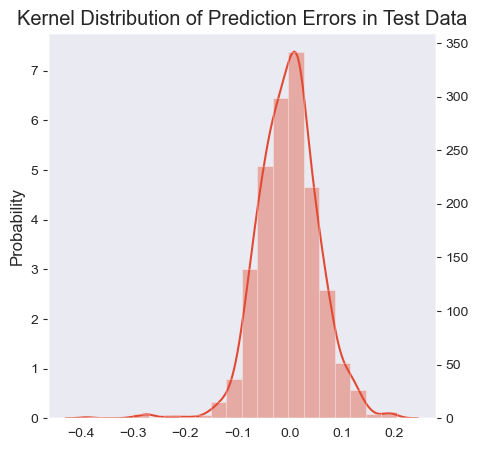

In [7]:
import tensorflow as tf
import numpy as np
# Definir a quantidade de amostras para Monte Carlo
T = 1000
# Função para previsão estocástica
@tf.function
def predict_stochastic(x):
    return model(x, training=True)
# Executar previsões Monte Carlo
y_hat_mct = np.array([predict_stochastic(X).numpy() for _ in range(T)])
# Redimensionar as previsões para a forma desejada
y_hat_mct = y_hat_mct.reshape(T, y.shape[0]).T
yhatt=pd.DataFrame(y_hat_mct)
meanyhatt=yhatt.apply(np.mean,axis=1)
desvyhatt=yhatt.apply(np.std,axis=1)
erro3=meanyhatt-y
es3=erro3.loc[:,].mean()
ea3=erro3.loc[:,].std()

# Criando o ambiente do gráfico 
sns.set_style("dark")
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# Insere curva KDE (Kernel Density Estimation)
g1 = sns.distplot(erro3, ax=ax, 
                  kde=True, hist=False) 
# Insere histograma
ax_copy = ax.twinx()
g2 = sns.distplot(erro3, ax=ax_copy, kde=False, hist=True, 
             bins=bins, norm_hist=False)
# Ajusta rótulos
g1.set_ylabel("Probability")
g2.set_title("Kernel Distribution of Prediction Errors in Test Data")

plt.show()

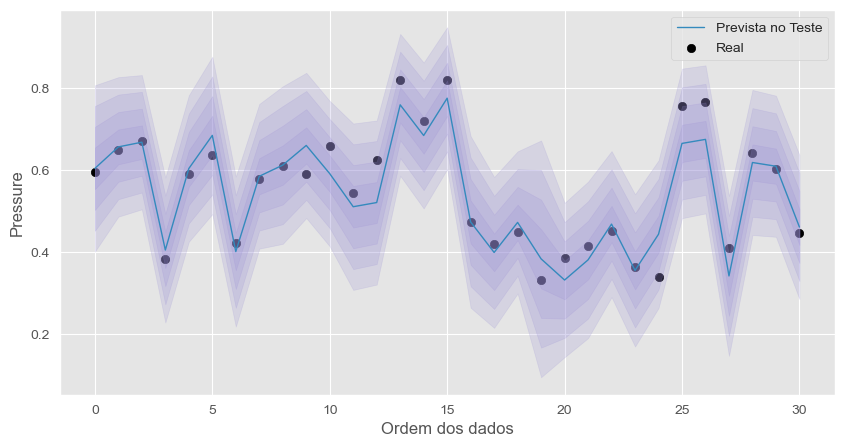

In [8]:
#Computamos média e variância para cada ponto no set de teste.
l = 10
p_dropout =0.5
lbd = 1e-4 
y_hat_test_mean = np.mean(y_hat_mc, axis=1) # média das 1000 previsões para cada ponto 
y_hat_test_variance = np.var(y_hat_mc, axis=1) 
tau = l**2 * (1 - p_dropout) / (2 * X_train.shape[0] * lbd)
y_hat_test_variance += tau**-1  # variância das 1000 previsões para cada ponto 
n = 31
t = range(n) 
mu = y_hat_test_mean
sigma = np.sqrt(y_hat_test_variance)

plt.style.use("ggplot")
f = plt.figure(figsize=(10,5))
plt.plot(t, mu, label="Prevista no Teste", color="C1", lw=1)
plt.scatter(t, y_test, color="black", label="Real")

for shade in range(1, 5):
    plt.fill_between(t, mu+sigma* (.5*shade), mu-sigma * (.5*shade), alpha=0.2, color="C2")

plt.ylabel("Pressure")
plt.xlabel("Ordem dos dados")
plt.legend(loc="best")
f.savefig("rnn_demanda_test.png")
plt.show()


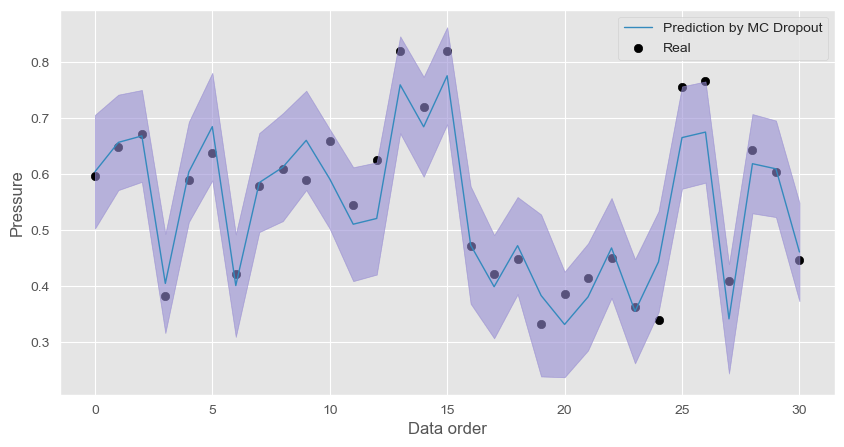

In [9]:
n = 31
t = range(n) 
mu = y_hat_test_mean
sigma = np.sqrt(y_hat_test_variance)

plt.style.use("ggplot")
f = plt.figure(figsize=(10,5))
plt.plot(t, mu, label="Prediction by MC Dropout", color="C1", lw=1)
plt.scatter(t, y_test, color="black", label="Real")

for shade in range(1, 5):
    plt.fill_between(t, mu+sigma, mu-sigma, alpha=0.2, color="C2")

plt.ylabel("Pressure")
plt.xlabel("Data order")
plt.legend(loc="best")
f.savefig("rnn_demanda_test.svg")
plt.show()

In [10]:
X_test=X_test.reset_index(drop=True)
previsão=model.predict(X_test[:31])
colnames=["Predict"]
previsão1=pd.DataFrame(previsão, columns=colnames)
df.resume3=pd.concat([X_test,y_test,previsão1],axis=1)
#método numerico para derivadas parcias: método das diferenças onde h=0.000001
h1=0.000001
h2=0.000001
h3=0.000001
h4=0.000001
h5=0.000001

deltax1=X_test[:31]+np.array([h1,0,0,0,0])
previsãodeltax1=model.predict(deltax1[:31])
colnames=["Predict Deltax1"]
previsãodeltax1=pd.DataFrame(previsãodeltax1, columns=colnames)

deltax2=X_test[:31]+np.array([0,h2,0,0,0])
previsãodeltax2=model.predict(deltax2[:31])
colnames=["Predict Deltax2"]
previsãodeltax2=pd.DataFrame(previsãodeltax2, columns=colnames)

deltax3=X_test[:31]+np.array([0,0,h3,0,0])
previsãodeltax3=model.predict(deltax3[:31])
colnames=["Predict Deltax3"]
previsãodeltax3=pd.DataFrame(previsãodeltax3, columns=colnames)

deltax4=X_test[:31]+np.array([0,0,0,h4,0])
previsãodeltax4=model.predict(deltax4[:31])
colnames=["Predict Deltax4"]
previsãodeltax4=pd.DataFrame(previsãodeltax4, columns=colnames)
deltax5=X_test[:31]+np.array([0,0,0,0,h5])
previsãodeltax5=model.predict(deltax5[:31])
colnames=["Predict Deltax5"]
previsãodeltax5=pd.DataFrame(previsãodeltax5, columns=colnames)

df.total=pd.concat([y_test,previsão1,previsãodeltax1,previsãodeltax2,previsãodeltax3,previsãodeltax4,previsãodeltax5],axis=1)

df.total['c1']=(df.total['Predict Deltax1']-df.total['Predict'])/h1
df.total['c2']=(df.total['Predict Deltax2']-df.total['Predict'])/h2
df.total['c3']=(df.total['Predict Deltax3']-df.total['Predict'])/h3
df.total['c4']=(df.total['Predict Deltax4']-df.total['Predict'])/h4
df.total['c5']=(df.total['Predict Deltax5']-df.total['Predict'])/h5


#cálculo da incerteza combinada : incerteza expandida de x1 a x5  desvio padrão do erro sistemático
#x1: medidor de frequencia sonora.5% do valor médio da escala
#x2: medidor de angulo :5% do valor médio da escala
#x3: medidor de comprimento 5% do valor médio da escala
#x4: medidor de velocidade do vento Pesquisando a incerteza em tuneis de vento chega a 15% do resultado . Como a velocidade média é em torno de 40 m/s estimou-se em +-6m/s²
#x5: medidor de sucção 5% do valor médio da escala
#y: pressão somora: 5% do valor médio da escala
upx1=0.0003468*0.5/2
upx2=0.00488*0.5/2
upx3=0.001470*0.5/2
upx4=0.01966*0.5/2
upx5=0.1*0.5/2
upy=0.008*0.5/2

df_n.rename(columns={
    0: 'Frequency',1:'Angle',2:'Length',3:'Velocity',4:'Suction Side',5:'Pressure'   
},inplace=True)
correlation= df_n.corr()
r_12=correlation['Frequency']['Angle']
r_13=correlation['Frequency']['Length']
r_14=correlation['Frequency']['Velocity']
r_15=correlation['Frequency']['Suction Side']
r_23=correlation['Angle']['Length']
r_24=correlation['Angle']['Velocity']
r_25=correlation['Angle']['Suction Side']
r_34=correlation['Length']['Suction Side']
r_35=correlation['Length']['Velocity']
r_45=correlation['Velocity']['Suction Side']


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


C:\Users\AdmPDI\AppData\Local\Temp\ipykernel_24716\1578317828.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.resume3=pd.concat([X_test,y_test,previsão1],axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


C:\Users\AdmPDI\AppData\Local\Temp\ipykernel_24716\1578317828.py:37: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.total=pd.concat([y_test,previsão1,previsãodeltax1,previsãodeltax2,previsãodeltax3,previsãodeltax4,previsãodeltax5],axis=1)


In [11]:
#ucca=incerteza dos dados
ucca=((df.total['c1']*upx1)**2+
      (df.total['c2']*upx2)**2+
      (df.total['c3']*upx3)**2+
      (df.total['c4']*upx4)**2+
      (df.total['c5']*upx5)**2+
      2*df.total['c1']*df.total['c2']*upx1*upx2*r_12+
      2*df.total['c1']*df.total['c3']*upx1*upx3*r_13+
      2*df.total['c1']*df.total['c4']*upx1*upx4*r_14+
      2*df.total['c1']*df.total['c5']*upx1*upx5*r_15+
      2*df.total['c2']*df.total['c3']*upx2*upx3*r_23+
      2*df.total['c2']*df.total['c4']*upx2*upx4*r_24+
      2*df.total['c2']*df.total['c5']*upx2*upx5*r_25+
      2*df.total['c3']*df.total['c4']*upx3*upx4*r_34+
      2*df.total['c3']*df.total['c5']*upx3*upx5*r_35+
      2*df.total['c4']*df.total['c5']*upx4*upx5*r_45
                  +upy**2)**0.5

#ucce=Erro randômico do modelo 
ucce=((RE)**2)**0.5
#incerteza combinada ucc
ucc=(ucca**2+ucce**2)**0.5
#incerteza expandida (95%) com a dição do erro sistemático (SE)
U= 2*ucc+abs(SE)
df.total['ucca']=ucca
df.total['ucce']=ucce
df.total['ucc']=ucc
df.total['U']=U

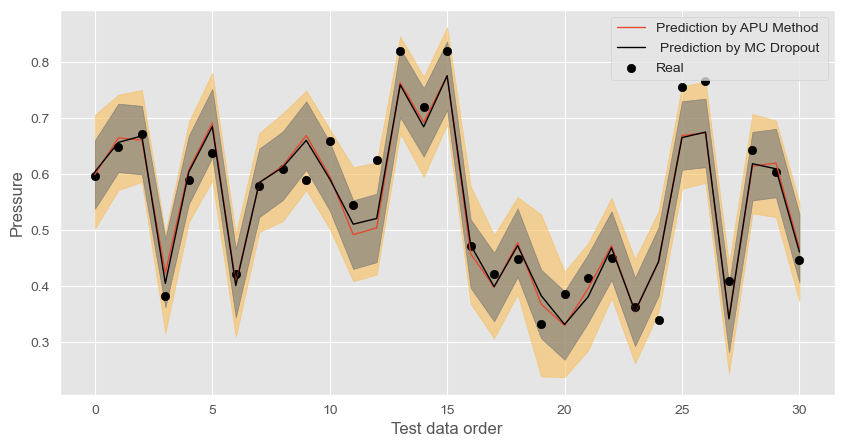

In [12]:
n = 31
t = range(n) 

plt.style.use("ggplot")
f = plt.figure(figsize=(10,5))
plt.plot(t, df.total['Predict'], label="Prediction by APU Method ", color="C7", lw=1)
plt.plot(t, mu, label=" Prediction by MC Dropout", color="Black", lw=1)
for shade in range(1, 5):
    plt.fill_between(t, mu+sigma, mu-sigma , alpha=0.2, color="C11")
for shade in range(1, 5):
    plt.fill_between(t, df.total['Predict']-df.total['ucce'], df.total['Predict']+df.total['ucce'], alpha=0.2, color="C3")

plt.scatter(t, df.total[5], color="black", label="Real")
plt.ylabel("Pressure")
plt.xlabel("Test data order")
plt.legend(loc="best")
f.savefig("rnn_demanda_test4.pdf",format='pdf')
plt.show()

In [13]:
MCCC=pd.concat([df.total[5],df.total['Predict'],df.total['ucca'],df.total['ucce'],df.total['ucc'],df.total['U']],axis=1)
# Definir os nomes das colunas
nomes_colunas = ['Real','GUM Predict','GUM Aleatoric Uncertainty','GUM Epistemic Uncertainty','GUM Preditive Uncertainty','GUM_U_exp']
# Atribuir os nomes das colunas ao DataFrame
MCCC.columns = nomes_colunas
#MCCC
#MCCC tabela com as discriminações das incertezas 


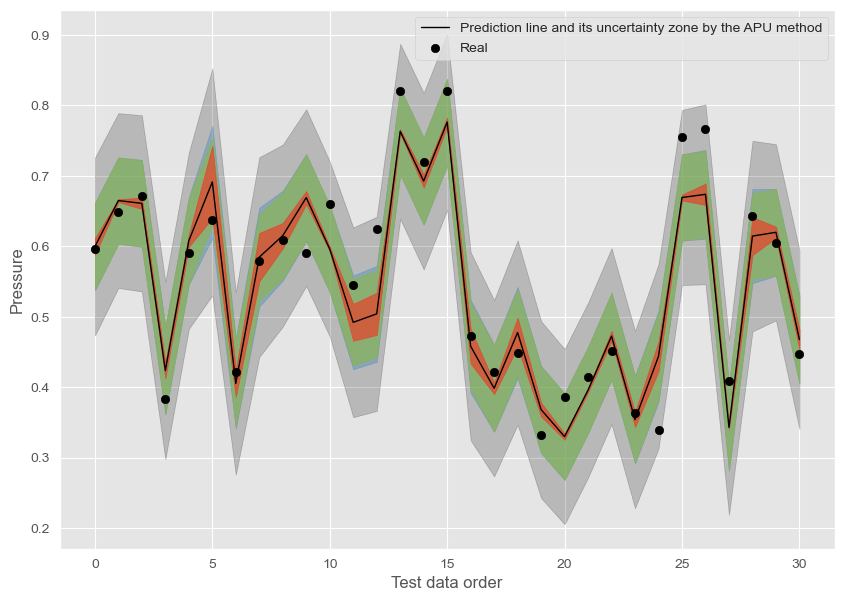

In [14]:
n = 31
t = range(n) 

plt.style.use("ggplot")
f = plt.figure(figsize=(10,7))
plt.plot(t, MCCC['GUM Predict'], label='Prediction line and its uncertainty zone by the APU method', color="Black", lw=1)

for shade in range(1, 5):
    plt.fill_between(t, MCCC['GUM Predict']-MCCC['GUM_U_exp'],  MCCC['GUM Predict']+MCCC['GUM_U_exp'], alpha=0.05,color="black")
for shade in range(1, 5):
    plt.fill_between(t, MCCC['GUM Predict']-MCCC['GUM Preditive Uncertainty'],  MCCC['GUM Predict']+MCCC['GUM Preditive Uncertainty'], alpha=0.1, color="C8")
for shade in range(1, 5):
    plt.fill_between(t, MCCC['GUM Predict']-MCCC['GUM Epistemic Uncertainty'],  MCCC['GUM Predict']+MCCC['GUM Epistemic Uncertainty'], alpha=0.2, color="C5")
for shade in range(1, 5):
    plt.fill_between(t, MCCC['GUM Predict']-MCCC['GUM Aleatoric Uncertainty'],  MCCC['GUM Predict']+MCCC['GUM Aleatoric Uncertainty'], alpha=0.3, color="C7")

plt.scatter(t, MCCC['Real'], color="black", label="Real")

plt.ylabel("Pressure")
plt.xlabel("Test data order")

plt.legend(loc="best")

f.savefig("APUU",format='pdf')

In [15]:
upx1=0.0003468*0.5/2
upx2=0.00488*0.5/2
upx3=0.001470*0.5/2
upx4=0.01966*0.5/2
upx5=0.1*0.5/2
upy=0.008*0.5/2
#matriz das incertezas 
I = [
    [upx1**2, upx1*upx2,upx1*upx3,upx1*upx4,upx1*upx5],[0, upx2**2,upx2*upx3,upx2*upx4,upx2*upx5],
    [0, 0,upx3**2,upx3*upx4,upx3*upx5], [0, 0,0,upx4**2,upx4*upx5],
   [0, 0,0,0,upx5**2]]
Id=pd.DataFrame(I)
#print(Id)

#matriz dos coeficientes de correlação 
correlation= df_n.corr()
matriz =correlation.values
#print(matriz)
# Matriz das covariâncias 
A = I
B = matriz

# Criando uma nova matriz C multiplicando os elementos correspondentes de A e B
C = []

for i in range(len(A)):
    new_row = []
    for j in range(len(A[0])):
        new_row.append(A[i][j] * B[i][j])
    C.append(new_row)

# Imprimindo a matriz resultante C
#for row in C:
   # print(row)

#matriz das derivadas parciais 

#definindo um vi 
x1=0.040404
x2= 0.783784
x3=0.000000
x4=1.000000
x5=0.270697
data = { 'x1': [x1],'x2': [x2],'x3': [x3],'x4': [x4],'x5': [x5]
}
# Criando um DataFrame a partir do dicionário
vi=pd.DataFrame(data)

# dado um vi pertencente ao domínio X

h=0.000001
yi=model.predict(vi)
c1=(model.predict(vi+np.array([h,0,0,0,0]))-model.predict(vi))/h
c2=(model.predict(vi+np.array([0,h,0,0,0]))-model.predict(vi))/h
c3=(model.predict(vi+np.array([0,0,h,0,0]))-model.predict(vi))/h
c4=(model.predict(vi+np.array([0,0,0,h,0]))-model.predict(vi))/h
c5=(model.predict(vi+np.array([0,0,0,0,h]))-model.predict(vi))/h

#matriz dos coef.de sensibilidade 
CS = [
    [c1**2, 2*c1*c2,2*c1*c3,2*c1*c4,2*c1*c5],[0, c2**2,2*c2*c3,2*c2*c4,2*c2*c5],
    [0, 0,c3**2,2*c3*c4,2*c3*c5], [0, 0,0,c4**2,2*c4*c5],
   [0, 0,0,0,c5**2]]

# Matriz das contribuições para incerteza 
A = C
B = CS

# Criando uma nova matriz C multiplicando os elementos correspondentes de A e B
MC = []

for i in range(len(A)):
    new_row = []
    for j in range(len(A[0])):
        new_row.append(A[i][j] * B[i][j])
    MC.append(new_row)
    
# Inicializando a variável de soma
soma_total = 0

# Percorrendo a matriz e somando os elementos
for linha in MC:
    for elemento in linha:
        soma_total += elemento

ucca_vi=(soma_total)**0.5
ucce_vi=((RE)**2)**0.5
ucc_vi=(ucca_vi**2+ucce_vi**2)**0.5
Up_vi= 2*ucc_vi+abs(SE)
Up_vi


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[0.12675467]], dtype=float32)

In [30]:
MCCC

,Real,GUM Predict,GUM Aleatoric Uncertainty,GUM Epistemic Uncertainty,GUM Preditive Uncertainty,GUM_U_exp
0,0.596591,0.599550,0.011651,0.061138,0.062238,0.126263
1,0.648363,0.664982,0.002026,0.061138,0.061171,0.124130
2,0.671870,0.661003,0.007868,0.061138,0.061642,0.125071
3,0.383147,0.423697,0.010940,0.061138,0.062109,0.126005
4,0.590555,0.607886,0.008354,0.061138,0.061706,0.125199
5,0.638046,0.691439,0.051025,0.061138,0.079633,0.161053
6,0.420906,0.405318,0.018783,0.061138,0.063958,0.129703
7,0.579068,0.584660,0.034197,0.061138,0.070052,0.141891
8,0.609434,0.615154,0.017867,0.061138,0.063695,0.129177
9,0.590342,0.669188,0.009196,0.061138,0.061826,0.125438


# Monte Carlo simulator for the test data 

In [38]:
correlation= df_n.corr()
r_12=correlation['Frequency']['Angle']
r_13=correlation['Frequency']['Length']
r_14=correlation['Frequency']['Velocity']
r_15=correlation['Frequency']['Suction Side']
r_21=correlation['Frequency']['Angle']
r_23=correlation['Angle']['Length']
r_24=correlation['Angle']['Velocity']
r_25=correlation['Angle']['Suction Side']
r_31=correlation['Frequency']['Length']
r_32=correlation['Angle']['Length']
r_34=correlation['Length']['Suction Side']
r_35=correlation['Length']['Velocity']
r_41=correlation['Frequency']['Velocity']
r_42=correlation['Angle']['Velocity']
r_43=correlation['Length']['Suction Side']
r_45=correlation['Velocity']['Suction Side']
r_51=correlation['Frequency']['Suction Side']
r_52=correlation['Angle']['Suction Side']
r_53=correlation['Length']['Velocity']
r_54=correlation['Velocity']['Suction Side']


# simulation mc  v0 

In [40]:
i=0
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC0=np.std(previsão)
MMC0=np.mean(previsão)

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 16s 515us/step


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


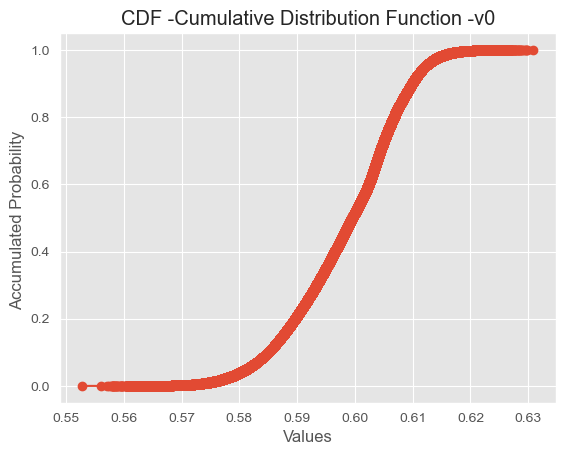

In [41]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Values')
plt.ylabel('Accumulated Probability ')
plt.title('CDF -Cumulative Distribution Function -v0')
plt.grid(True)
plt.savefig("CDF")
plt.show()




0    0.03582
dtype: float64


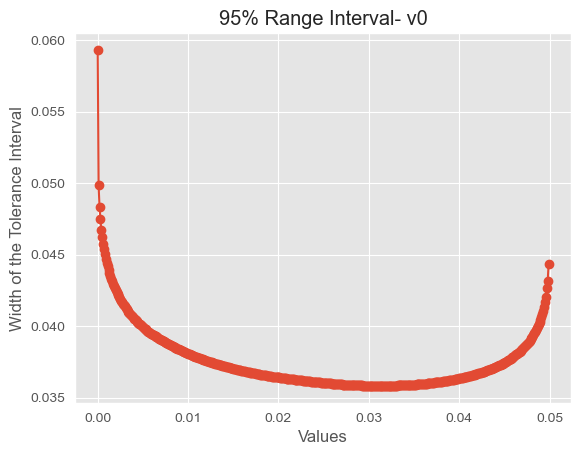

In [44]:
minvalue_IT0 = res.min()
print(minvalue_IT0)
plt.plot(x, res, marker='o')
plt.xlabel('Values')
plt.ylabel('Width of the Tolerance Interval')
plt.title('95% Range Interval- v0')
plt.grid(True)
plt.savefig("IT",format='pdf')
plt.show()

C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

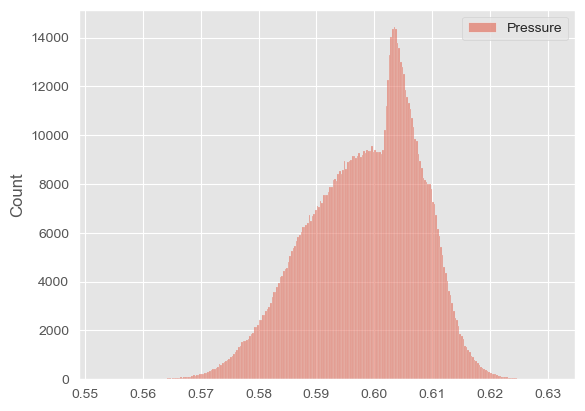

In [46]:
sns.histplot(previsão,)


# ymin e ymax 

In [48]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

from scipy.interpolate import interp1d
inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_0= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_0= inverse_cdf(percentile2)

print(ymin_0)
print(ymax_0)


0.5790168046951294
0.6148370504379272


# simulation mc  v1 

In [290]:
i=1
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC1=np.std(previsão)
MMC1=np.mean(previsão)

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 16s 516us/step


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

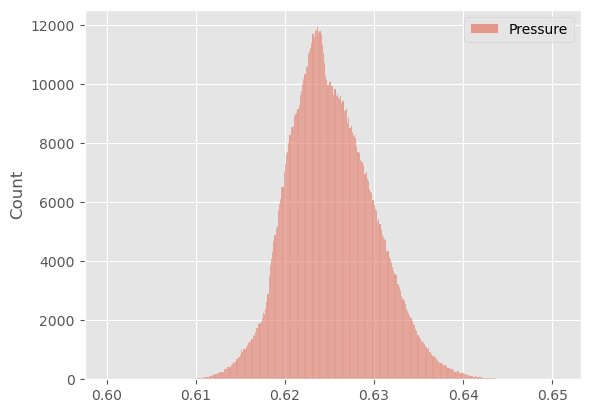

In [291]:
sns.histplot(previsão,)

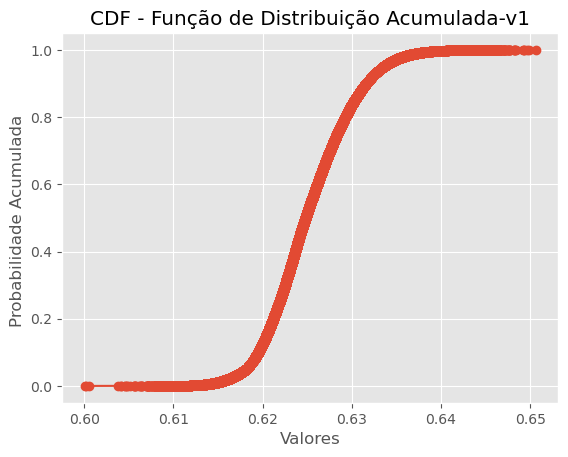

0    0.018669
dtype: float64


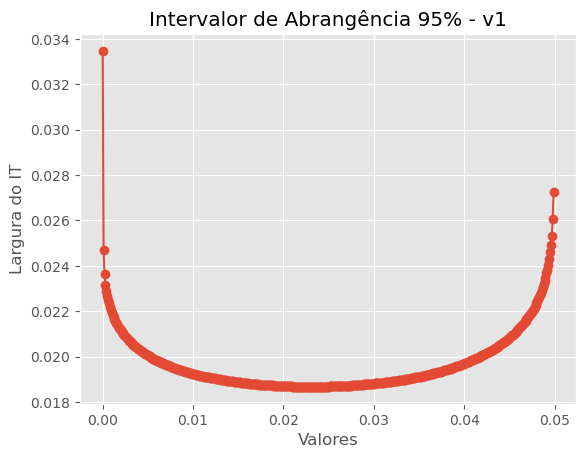

In [292]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v1')
plt.grid(True)
plt.show()

minvalue_IT1 = res.min()
print(minvalue_IT1)


plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalor de Abrangência 95% - v1')
plt.grid(True)
plt.show()

In [293]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_1= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_1= inverse_cdf(percentile2)

print(ymin_1)
print(ymax_1)


0.616350531578064
0.6350197792053223


# simulation  mc v2 

In [295]:
i=2
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC2=np.std(previsão)
MMC2=np.mean(previsão)

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 16s 506us/step


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

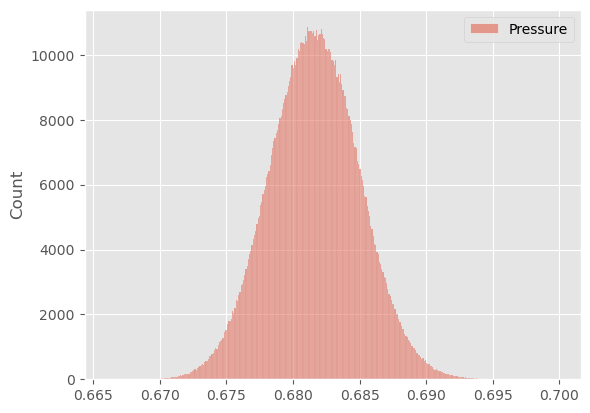

In [296]:
sns.histplot(previsão,)

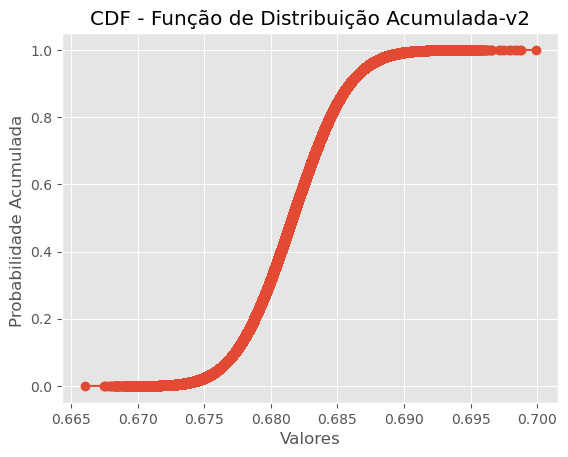

0    0.013238
dtype: float64


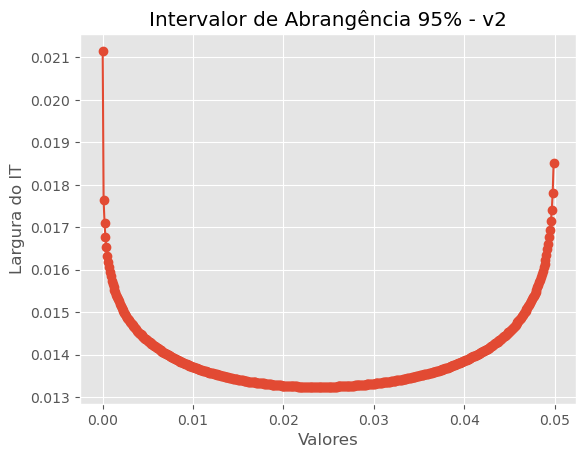

In [297]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v2')
plt.grid(True)
plt.show()

minvalue_IT2 = res.min()
print(minvalue_IT2)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalor de Abrangência 95% - v2')
plt.grid(True)
plt.show()

In [298]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_2= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_2= inverse_cdf(percentile2)

print(ymin_2)
print(ymax_2)


0.67501300573349
0.6882511377334595


# simulation  mc v3 

In [300]:
i=3
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC3=np.std(previsão)
MMC3=np.mean(previsão)

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 16s 500us/step


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

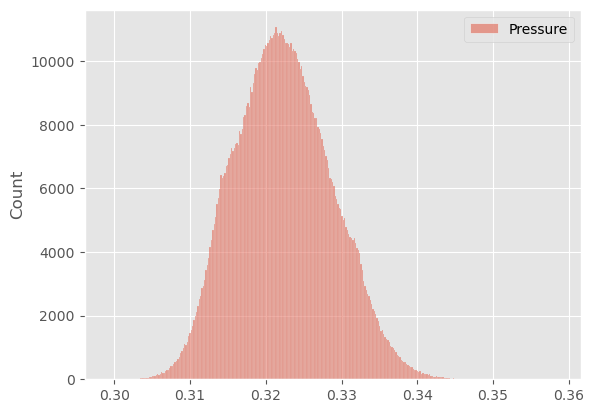

In [301]:
sns.histplot(previsão,)

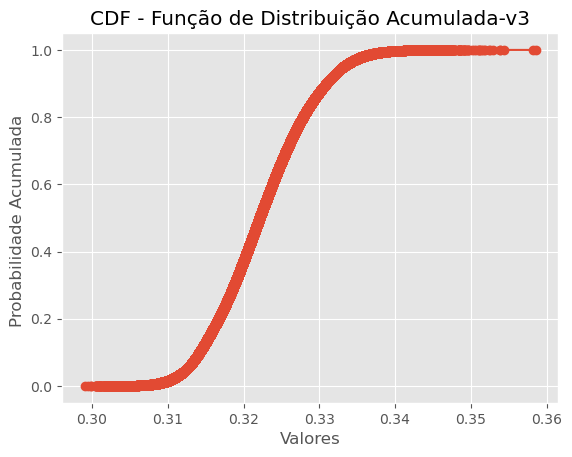

0    0.024116
dtype: float64


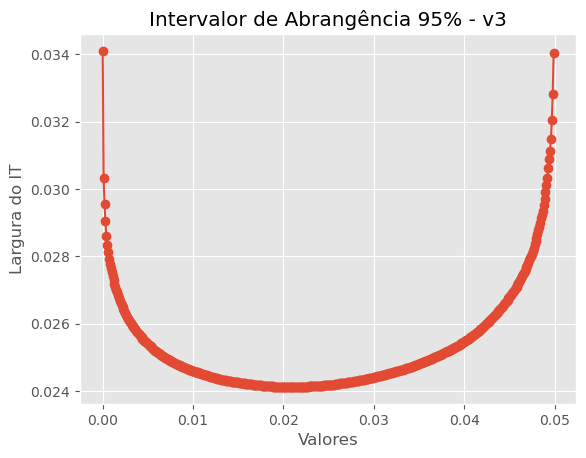

In [302]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v3')
plt.grid(True)
plt.show()

minvalue_IT3 = res.min()
print(minvalue_IT3)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalor de Abrangência 95% - v3')
plt.grid(True)
plt.show()

In [303]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_3= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_3= inverse_cdf(percentile2)

print(ymin_3)
print(ymax_3)


0.31065964698791504
0.3347756862640381


# simulation  mc v4

In [305]:
i=4
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC4=np.std(previsão)
MMC4=np.mean(previsão)

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 16s 518us/step


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

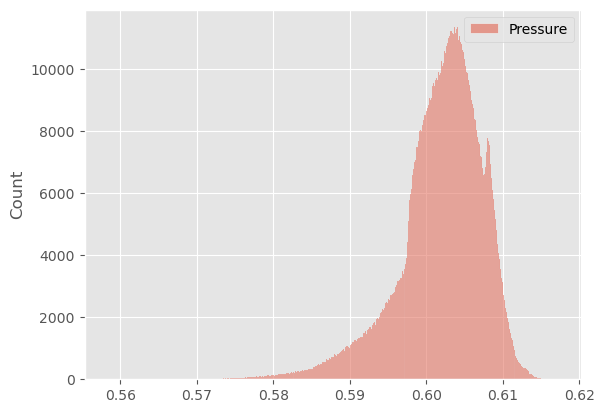

In [306]:
sns.histplot(previsão,)

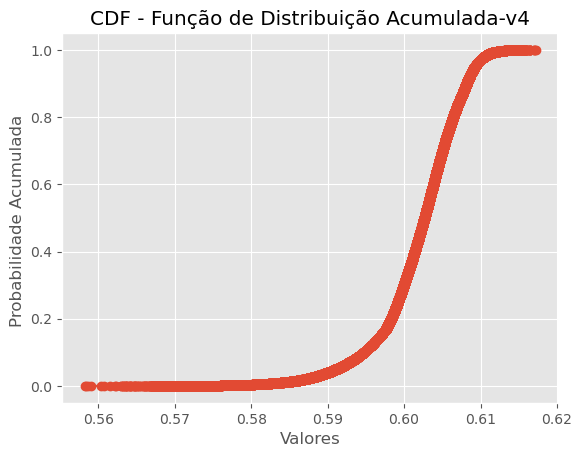

0    0.021273
dtype: float64


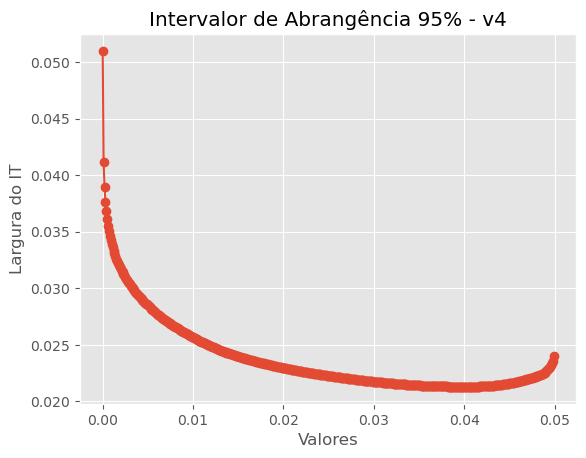

In [307]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v4')
plt.grid(True)
plt.show()

minvalue_IT4 = res.min()
print(minvalue_IT4)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalor de Abrangência 95% - v4')
plt.grid(True)
plt.show()

In [308]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_4= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_4= inverse_cdf(percentile2)

print(ymin_4)
print(ymax_4)


0.5900814533233643
0.6113549470901489


# simulation  mc v5 

In [310]:
i=5
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC5=np.std(previsão)
MMC5=np.mean(previsão)

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 16s 500us/step


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

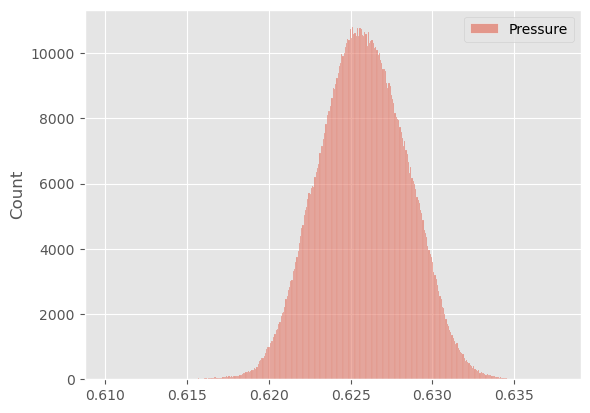

In [311]:
sns.histplot(previsão,)

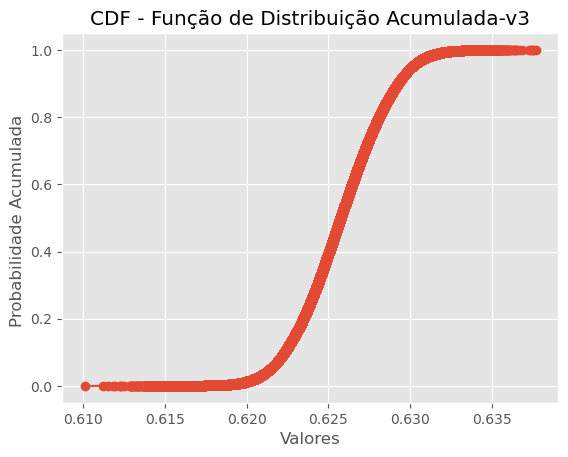

0    0.010185
dtype: float64


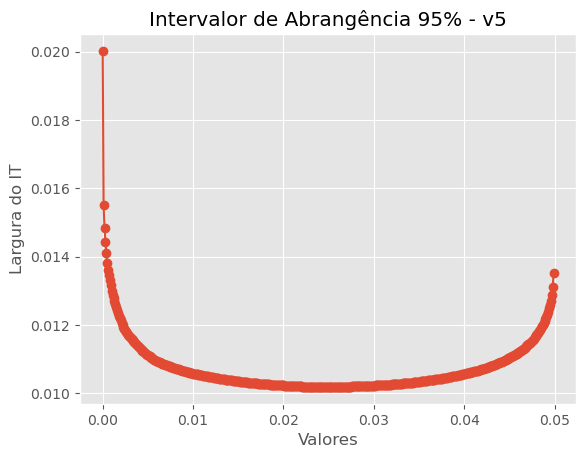

In [312]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v3')
plt.grid(True)
plt.show()

minvalue_IT5 = res.min()
print(minvalue_IT5)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalor de Abrangência 95% - v5')
plt.grid(True)
plt.show()

In [313]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_5= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_5= inverse_cdf(percentile2)

print(ymin_5)
print(ymax_5)

0.6206640005111694
0.6308490037918091


# simulation  mc v6 

In [315]:
i=6
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC6=np.std(previsão)
MMC6=np.mean(previsão)

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 17s 541us/step


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

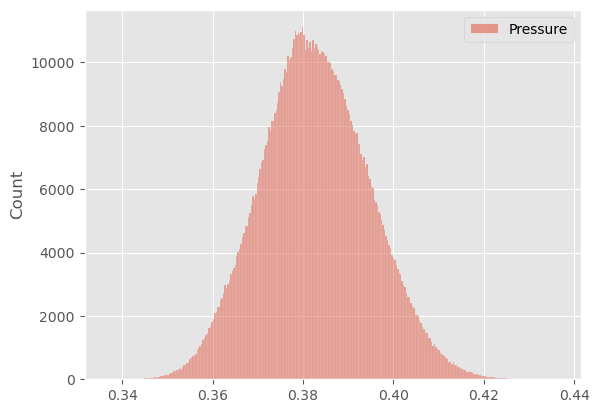

In [316]:
sns.histplot(previsão,)

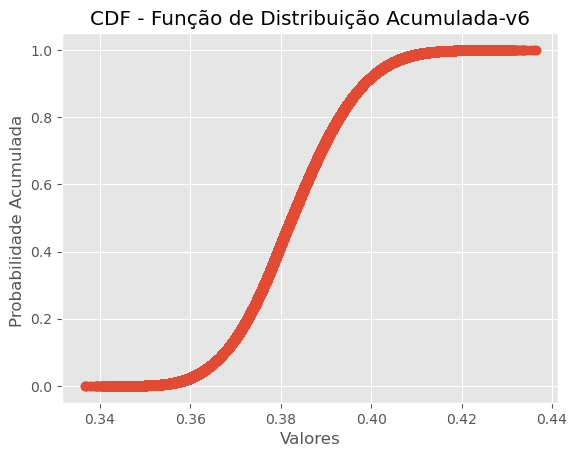

0    0.04669
dtype: float64


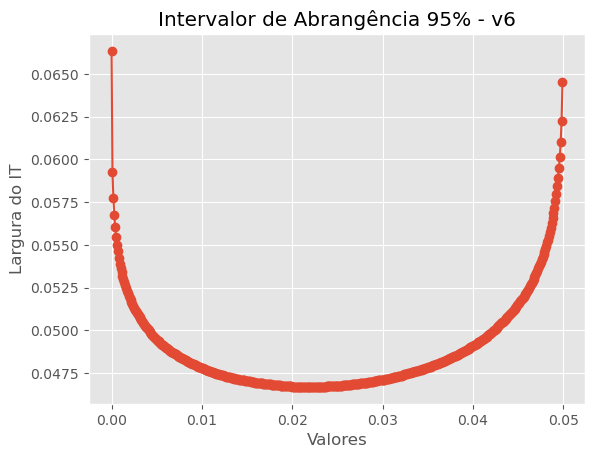

In [317]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v6')
plt.grid(True)
plt.show()

minvalue_IT6 = res.min()
print(minvalue_IT6)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalor de Abrangência 95% - v6')
plt.grid(True)
plt.show()

In [318]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_6= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_6= inverse_cdf(percentile2)
print(ymin_6)
print(ymax_6)

0.35961005091667175
0.40629976987838745


# simulação mc v7 

In [320]:
i=7
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC7=np.std(previsão)
MMC7=np.mean(previsão)

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 17s 535us/step


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

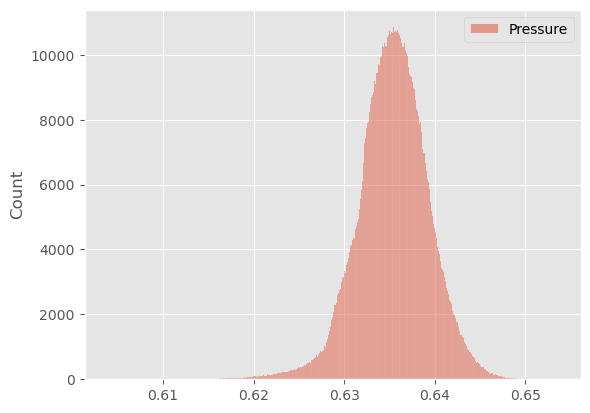

In [321]:
sns.histplot(previsão,)

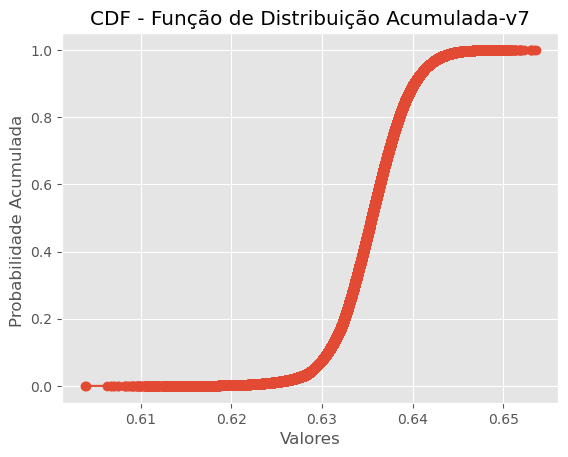

0    0.015313
dtype: float64


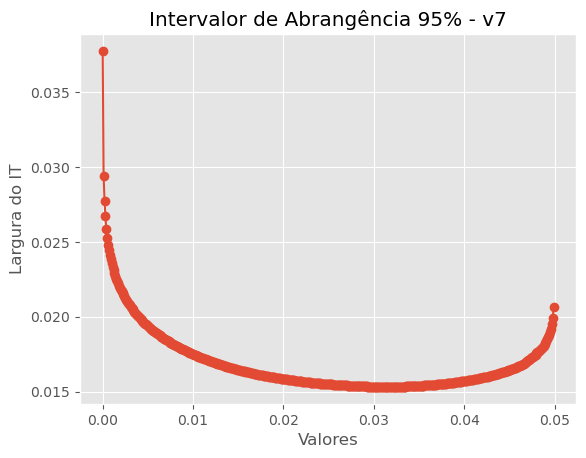

In [322]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v7')
plt.grid(True)
plt.show()

minvalue_IT7 = res.min()
print(minvalue_IT7)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalor de Abrangência 95% - v7')
plt.grid(True)
plt.show()

In [323]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_7= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_7= inverse_cdf(percentile2)
print(ymin_7)
print(ymax_7)

0.6279958486557007
0.6433089971542358


# simulação mc v8 

In [325]:
i=8
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC8=np.std(previsão)
MMC8=np.mean(previsão)

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 16s 520us/step


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

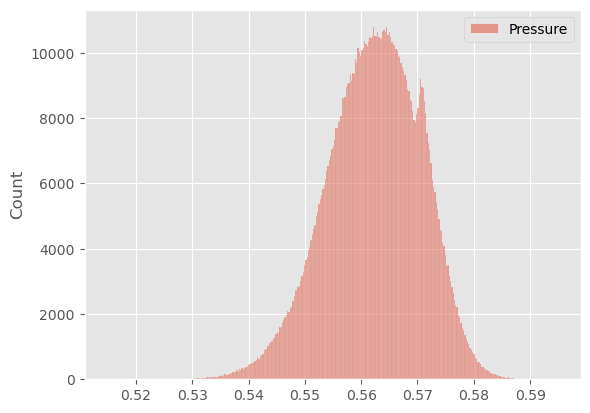

In [326]:
sns.histplot(previsão,)

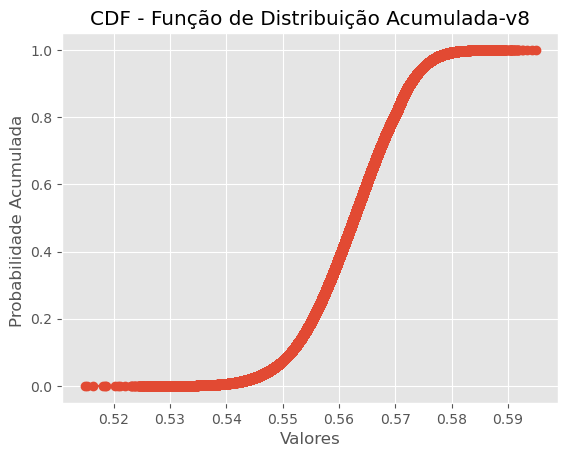

0    0.031749
dtype: float64


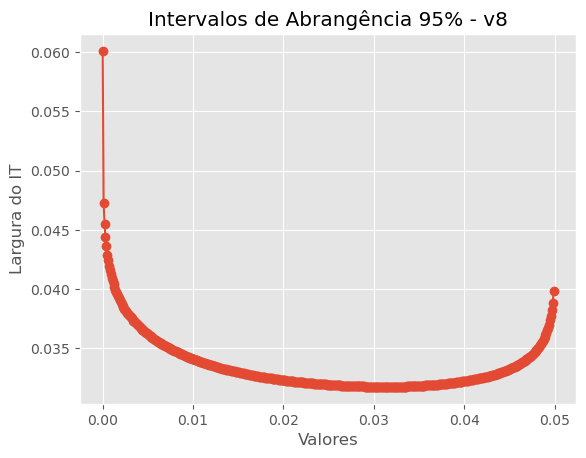

In [327]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v8')
plt.grid(True)
plt.show()

minvalue_IT8 = res.min()
print(minvalue_IT8)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v8')
plt.grid(True)
plt.show()

In [328]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_8= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_8= inverse_cdf(percentile2)
print(ymin_8)
print(ymax_8)

0.5458806157112122
0.5776300430297852


# simulação mc v9

In [330]:
i=9
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC9=np.std(previsão)
MMC9=np.mean(previsão)

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 16s 524us/step


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

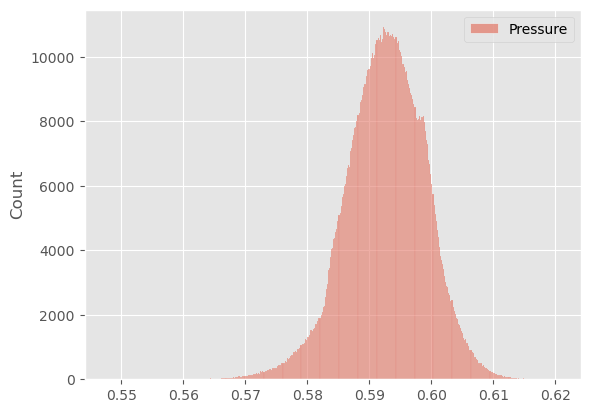

In [331]:
sns.histplot(previsão,)

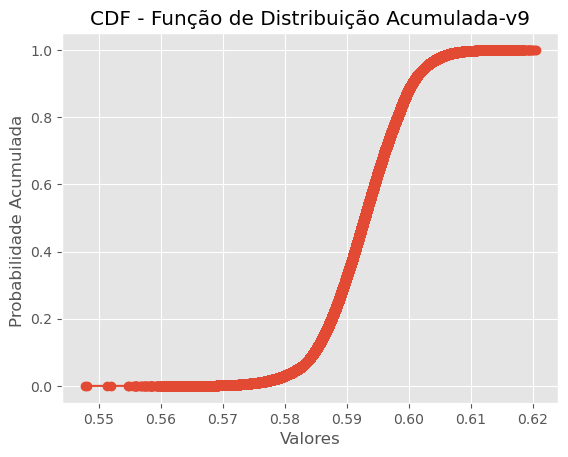

0    0.025378
dtype: float64


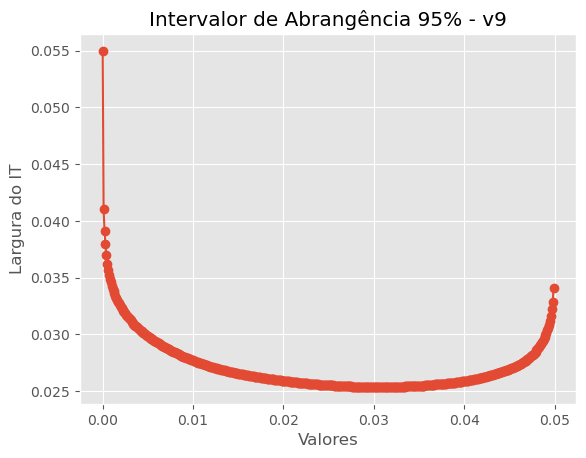

In [332]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v9')
plt.grid(True)
plt.show()

minvalue_IT9 = res.min()
print(minvalue_IT9)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalor de Abrangência 95% - v9')
plt.grid(True)
plt.show()

In [333]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_9= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_9= inverse_cdf(percentile2)
print(ymin_9)
print(ymax_9)

0.5799635648727417
0.6053413152694702


# simulação mc v10 

In [335]:
i=10
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC10=np.std(previsão)
MMC10=np.mean(previsão)

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 16s 518us/step


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

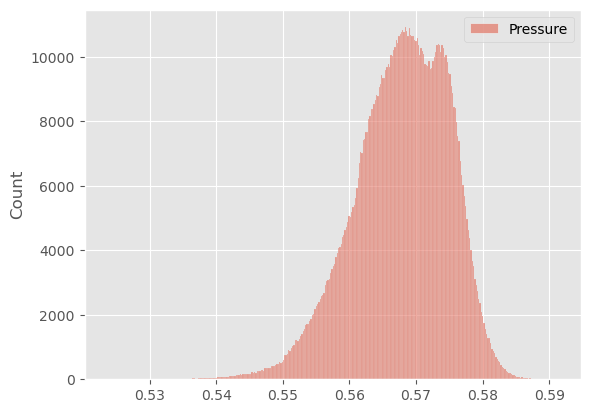

In [336]:
sns.histplot(previsão,)

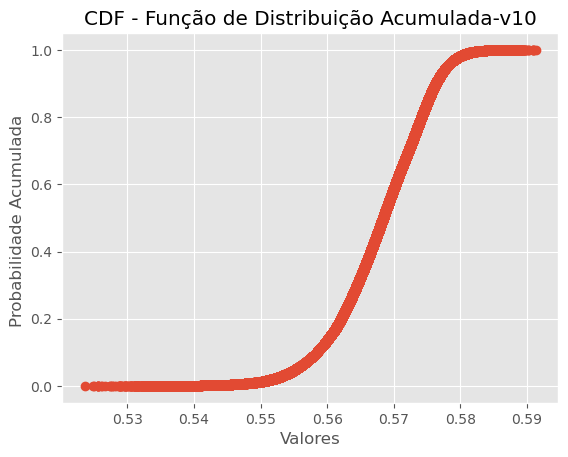

0    0.026486
dtype: float64


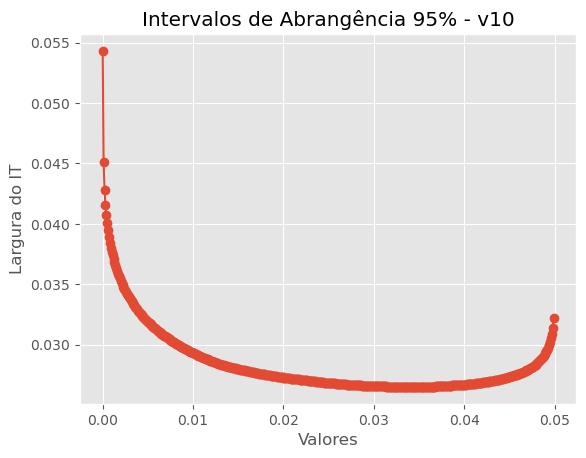

In [337]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v10')
plt.grid(True)
plt.show()

minvalue_IT10 = res.min()
print(minvalue_IT10)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v10')
plt.grid(True)
plt.show()

In [338]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_10= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_10= inverse_cdf(percentile2)
print(ymin_10)
print(ymax_10)

0.5537735223770142
0.5802594423294067


# simulação mc v11 

In [340]:
i=11
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC11=np.std(previsão)
MMC11=np.mean(previsão)

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 17s 532us/step


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

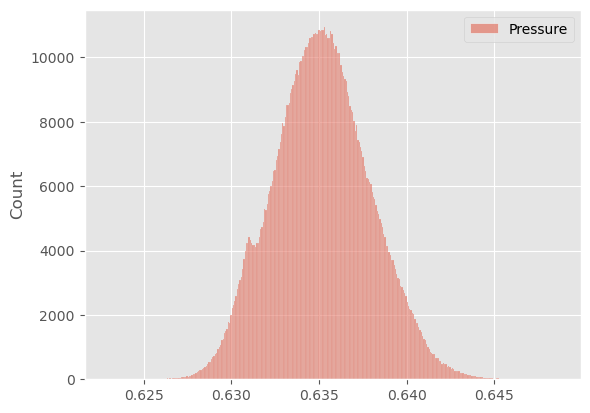

In [341]:
sns.histplot(previsão,)

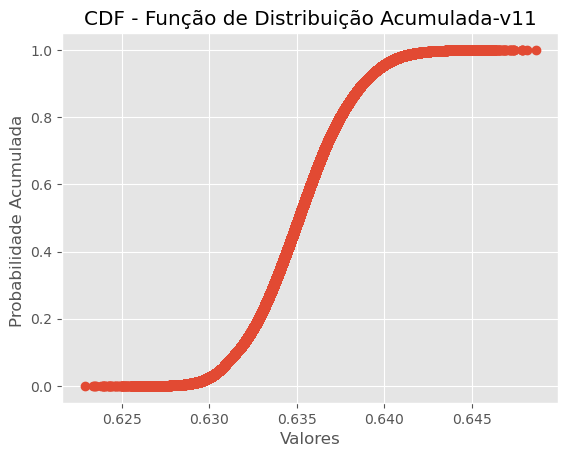

0    0.010677
dtype: float64


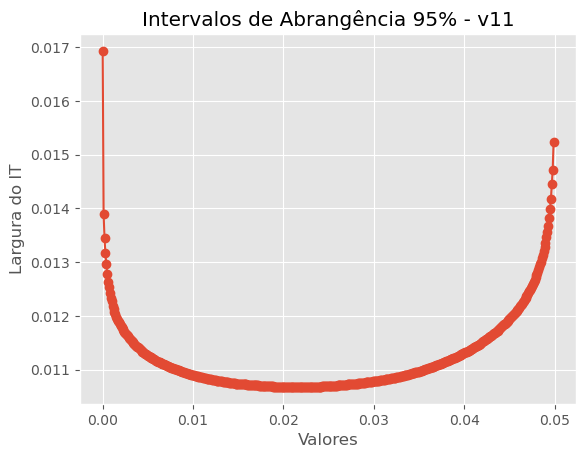

In [342]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v11')
plt.grid(True)
plt.show()

minvalue_IT11 = res.min()
print(minvalue_IT11)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v11')
plt.grid(True)
plt.show()

In [343]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_11= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_11= inverse_cdf(percentile2)
print(ymin_11)
print(ymax_11)

0.6298874020576477
0.6405645608901978


# simulação mc v12 

In [345]:
i=12
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC12=np.std(previsão)
MMC12=np.mean(previsão)

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 16s 519us/step


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

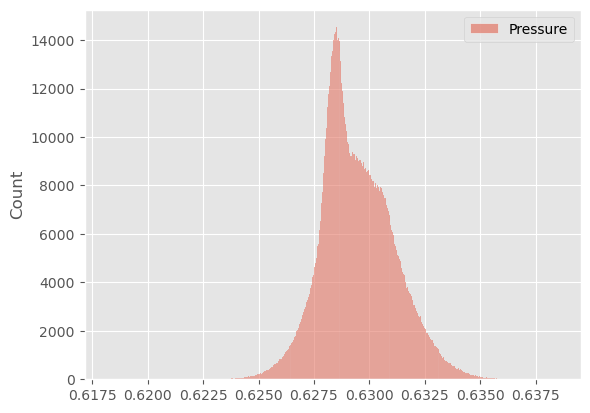

In [346]:
sns.histplot(previsão,)

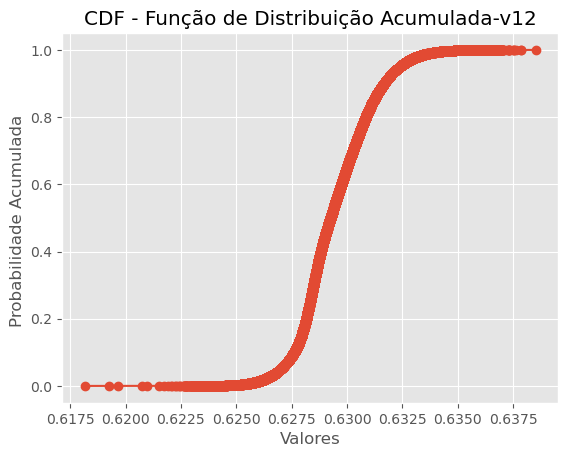

0    0.006548
dtype: float64


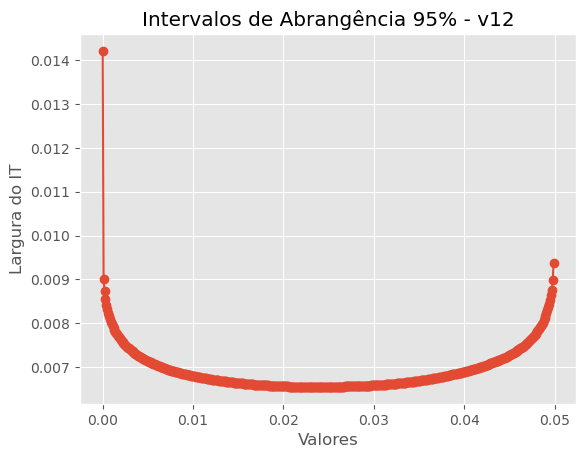

In [347]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v12')
plt.grid(True)
plt.show()

minvalue_IT12 = res.min()
print(minvalue_IT12)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v12')
plt.grid(True)
plt.show()

In [348]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_12= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_12= inverse_cdf(percentile2)
print(ymin_12)
print(ymax_12)

0.6263829469680786
0.6329308152198792


# simulação mc v13 

In [350]:
i=13
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC13=np.std(previsão)
MMC13=np.mean(previsão)

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 18s 569us/step


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

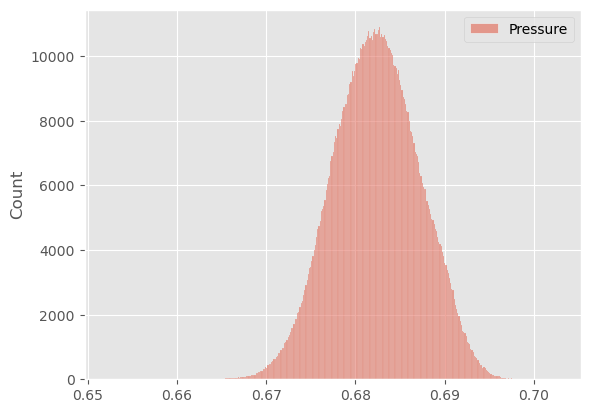

In [351]:
sns.histplot(previsão,)

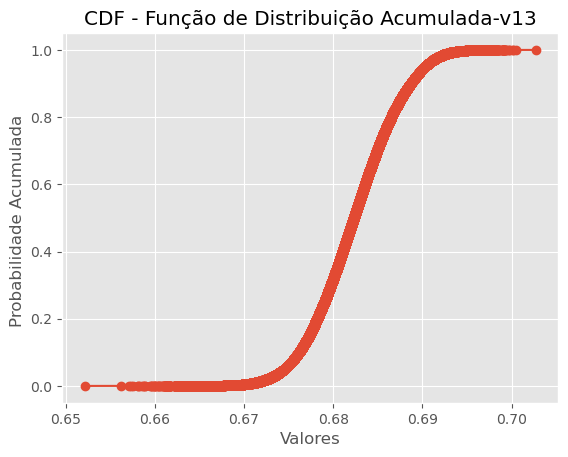

0    0.018482
dtype: float64


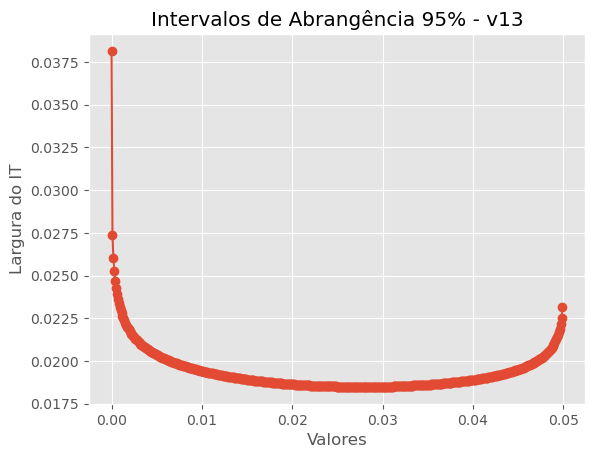

In [352]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v13')
plt.grid(True)
plt.show()

minvalue_IT13 = res.min()
print(minvalue_IT13)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v13')
plt.grid(True)
plt.show()

In [353]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_13= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_13= inverse_cdf(percentile2)
print(ymin_13)
print(ymax_13)

0.6731885671615601
0.6916708946228027


# simulação mc v14 

In [355]:
i=14
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC14=np.std(previsão)
MMC14=np.mean(previsão)

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 17s 547us/step


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

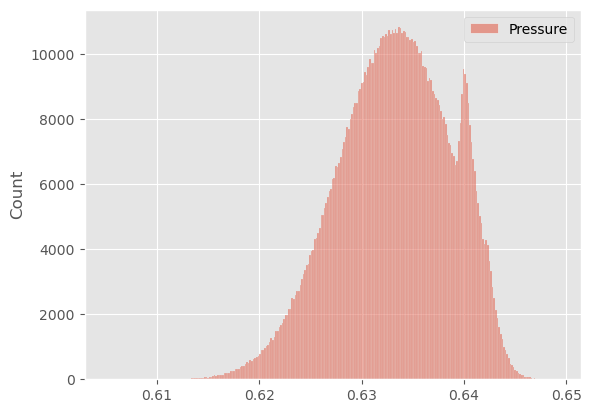

In [356]:
sns.histplot(previsão,)

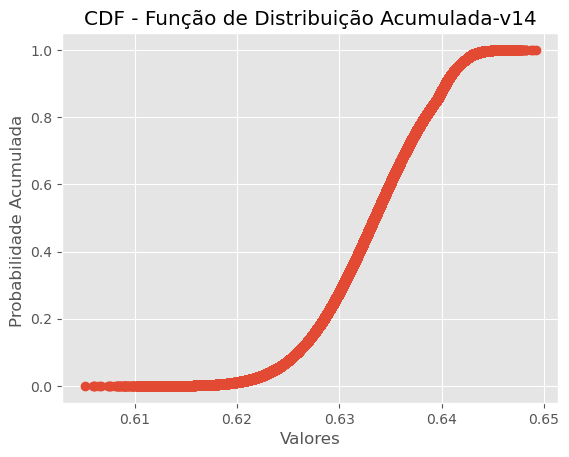

0    0.020191
dtype: float64


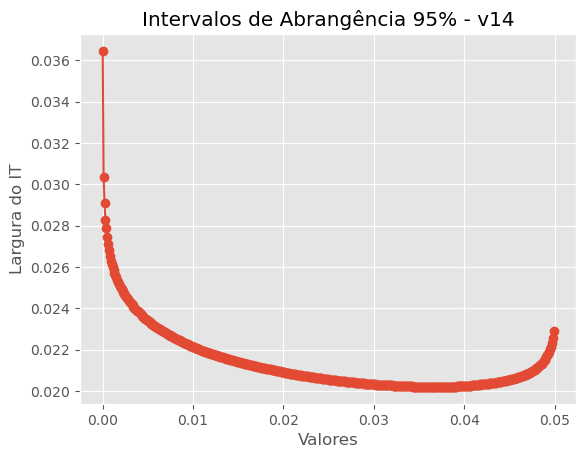

In [357]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v14')
plt.grid(True)
plt.show()

minvalue_IT14 = res.min()
print(minvalue_IT14)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v14')
plt.grid(True)
plt.show()

In [358]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_14= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_14= inverse_cdf(percentile2)
print(ymin_14)
print(ymax_14)

0.6229201555252075
0.6431114673614502


# simulação mc v15 

In [360]:
i=15
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC15=np.std(previsão)
MMC15=np.mean(previsão)

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 17s 539us/step


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

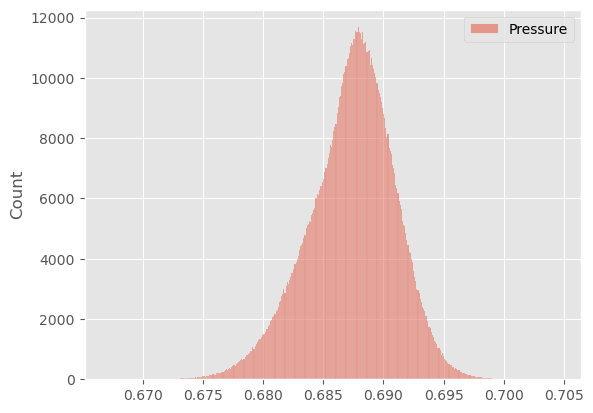

In [361]:
sns.histplot(previsão,)

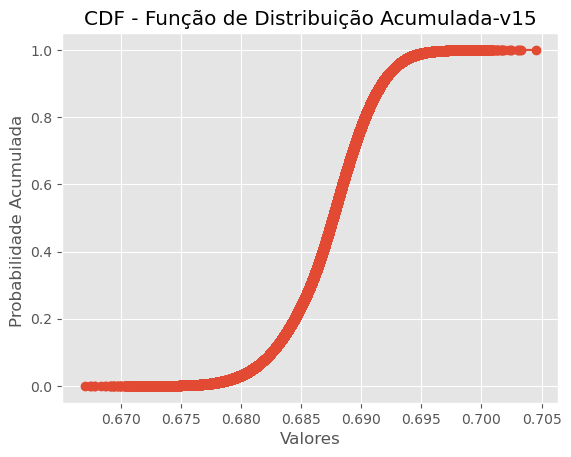

0    0.014217
dtype: float64


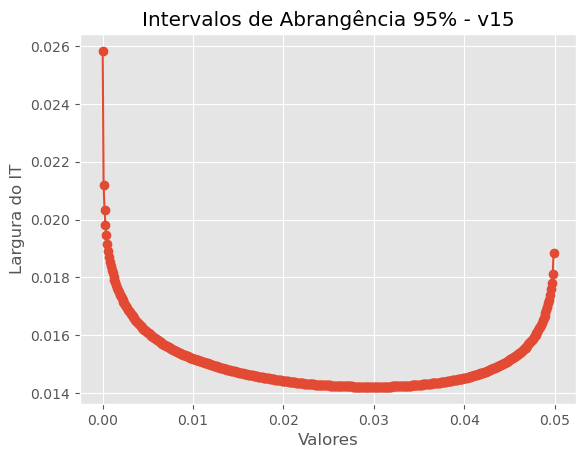

In [362]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v15')
plt.grid(True)
plt.show()

minvalue_IT15 = res.min()
print(minvalue_IT15)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v15')
plt.grid(True)
plt.show()

In [363]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_15= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_15= inverse_cdf(percentile2)
print(ymin_15)
print(ymax_15)

0.6799148917198181
0.6941314935684204


# simulação mc v16 

In [365]:
i=16
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC16=np.std(previsão)
MMC16=np.mean(previsão)

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 17s 529us/step


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

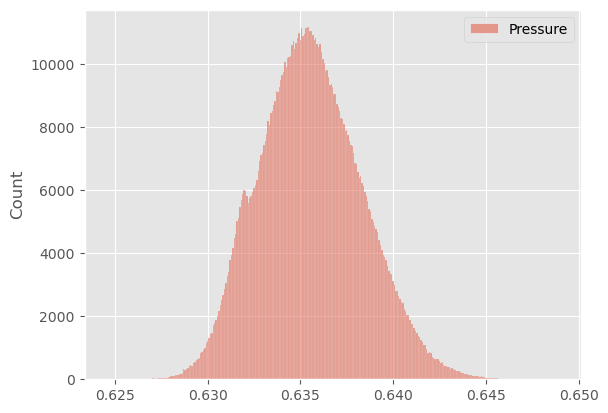

In [366]:
sns.histplot(previsão,)

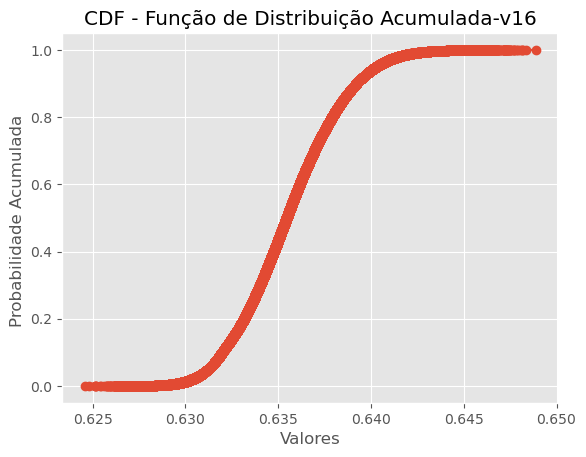

0    0.010618
dtype: float64


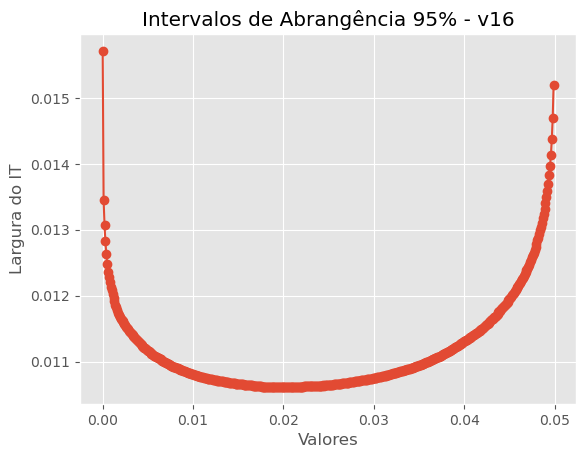

In [367]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v16')
plt.grid(True)
plt.show()

minvalue_IT16 = res.min()
print(minvalue_IT16)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v16')
plt.grid(True)
plt.show()

In [368]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_16= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_16= inverse_cdf(percentile2)
print(ymin_16)
print(ymax_16)

0.6303778886795044
0.6409955620765686


# simulação mc v17 

In [370]:
i=17
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC17=np.std(previsão)
MMC17=np.mean(previsão)

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 17s 530us/step


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

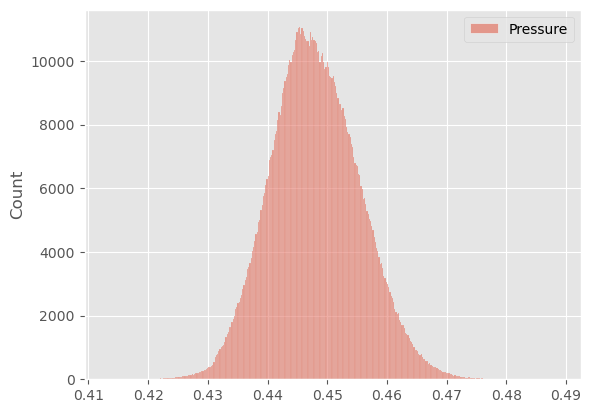

In [371]:
sns.histplot(previsão,)

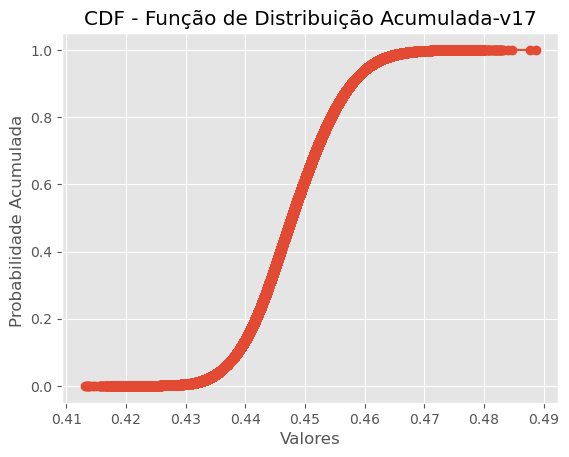

0    0.029064
dtype: float64


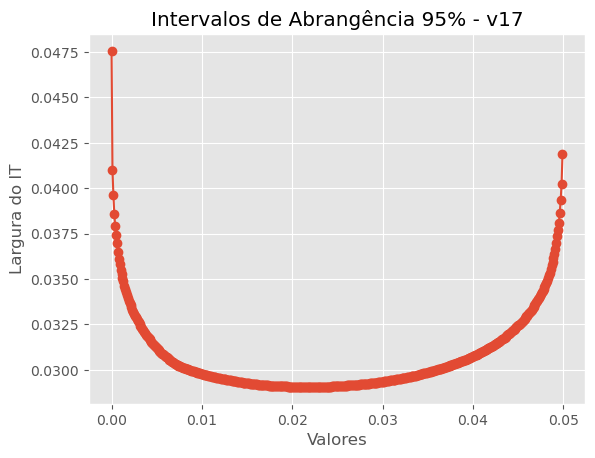

In [372]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v17')
plt.grid(True)
plt.show()

minvalue_IT17 = res.min()
print(minvalue_IT17)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v17')
plt.grid(True)
plt.show()

In [373]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_17= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_17= inverse_cdf(percentile2)
print(ymin_17)
print(ymax_17)

0.4338022470474243
0.4628659784793854


# simulação mc v18 

In [375]:
i=18
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC18=np.std(previsão)
MMC18=np.mean(previsão)

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 17s 538us/step


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

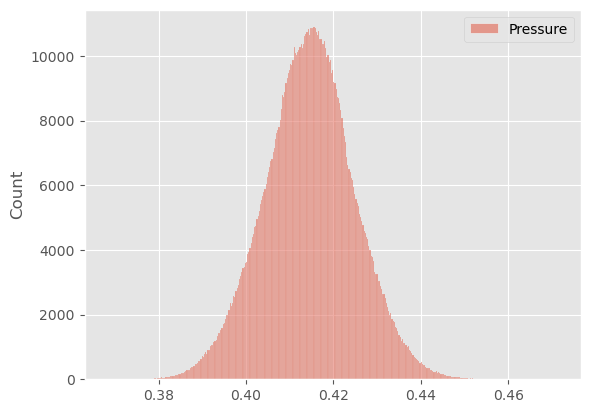

In [376]:
sns.histplot(previsão,)

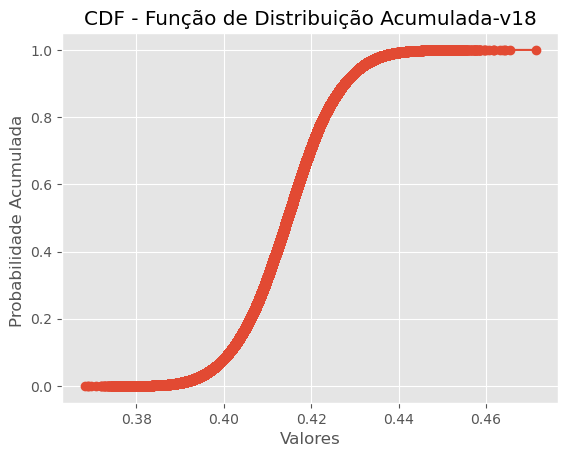

0    0.040825
dtype: float64


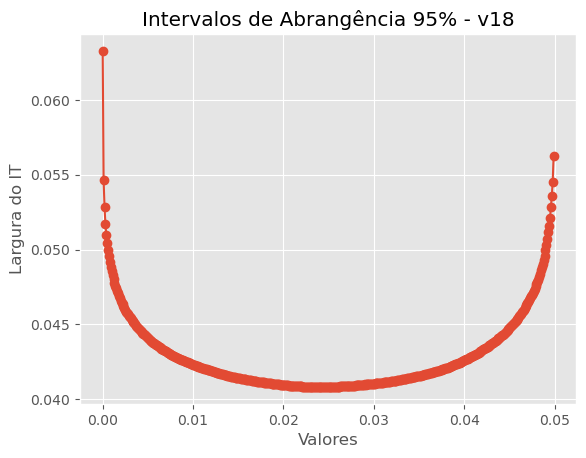

In [377]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v18')
plt.grid(True)
plt.show()

minvalue_IT18 = res.min()
print(minvalue_IT18)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v18')
plt.grid(True)
plt.show()

In [378]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_18= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_18= inverse_cdf(percentile2)
print(ymin_18)
print(ymax_18)

0.39398711919784546
0.43481254577636713


# simulação mc v19 

In [380]:
i=19
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC19=np.std(previsão)
MMC19=np.mean(previsão)

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 17s 540us/step


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

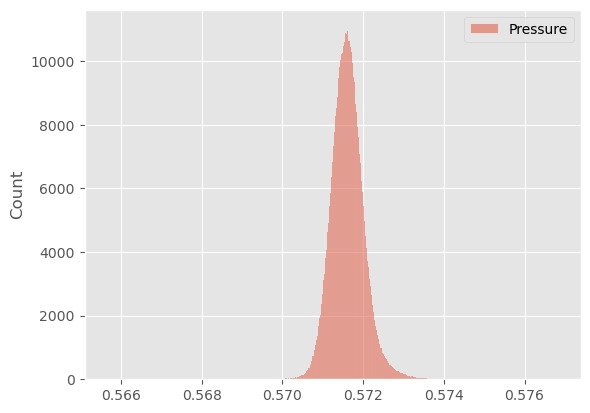

In [381]:
sns.histplot(previsão,)

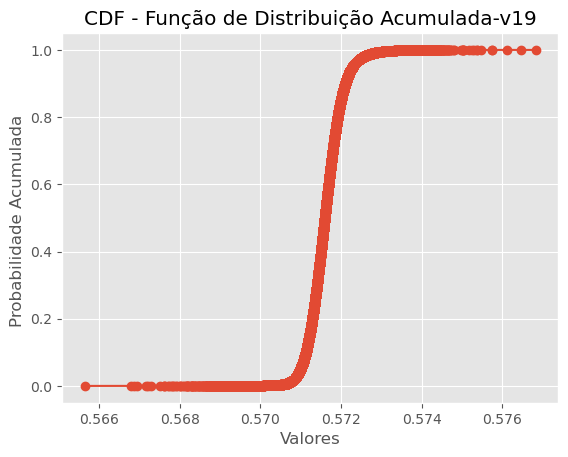

0    0.001599
dtype: float64


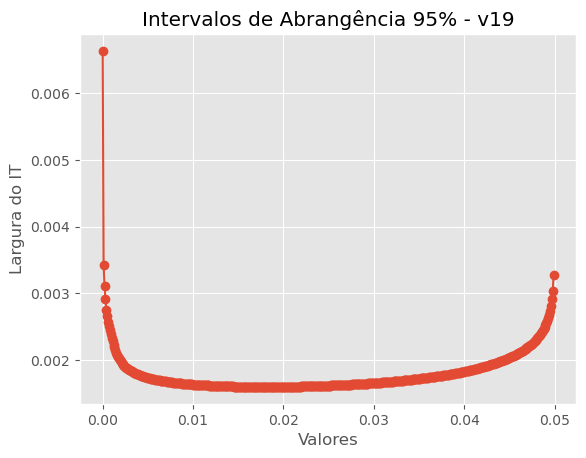

In [382]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v19')
plt.grid(True)
plt.show()

minvalue_IT19 = res.min()
print(minvalue_IT19)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v19')
plt.grid(True)
plt.show()

In [383]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_19= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_19= inverse_cdf(percentile2)
print(ymin_19)
print(ymax_19)

0.5708189606666565
0.5724183917045593


# simulação mc v20 

In [385]:
i=20
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC20=np.std(previsão)
MMC20=np.mean(previsão)

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 17s 539us/step


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

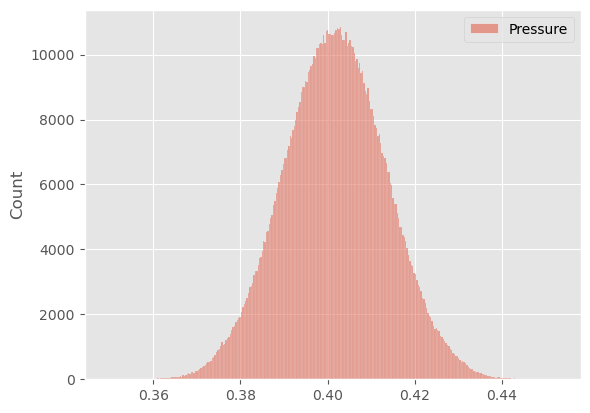

In [386]:
sns.histplot(previsão,)

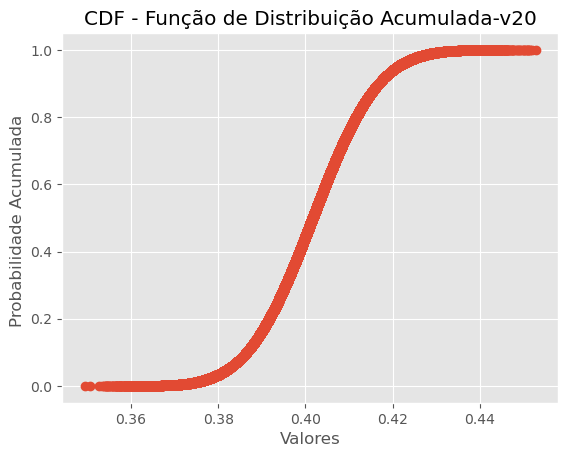

0    0.046438
dtype: float64


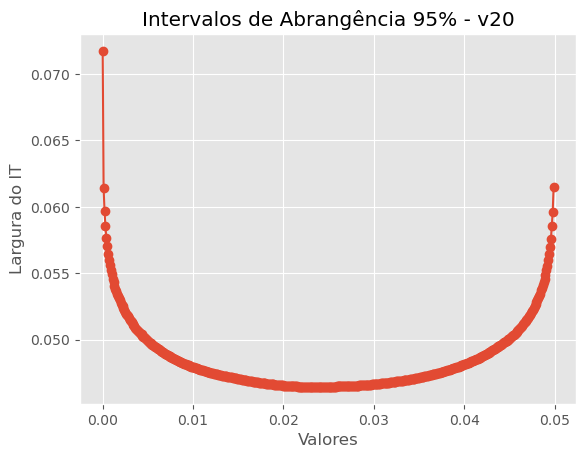

In [387]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v20')
plt.grid(True)
plt.show()

minvalue_IT20 = res.min()
print(minvalue_IT20)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v20')
plt.grid(True)
plt.show()

In [388]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_20= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_20= inverse_cdf(percentile2)
print(ymin_20)
print(ymax_20)

0.37812262773513794
0.424561083316803


# simulação mc v21 

In [390]:
i=21
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC21=np.std(previsão)
MMC21=np.mean(previsão)

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 16s 527us/step


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

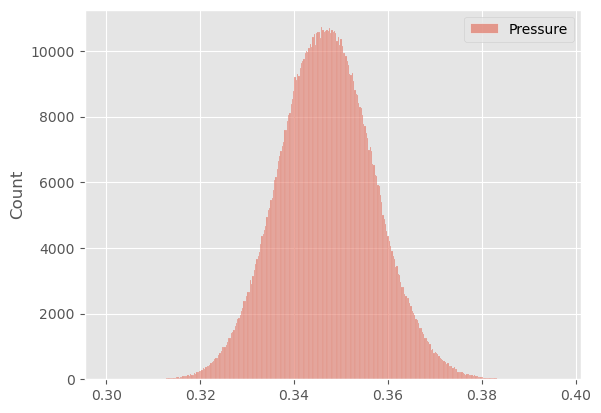

In [391]:
sns.histplot(previsão,)

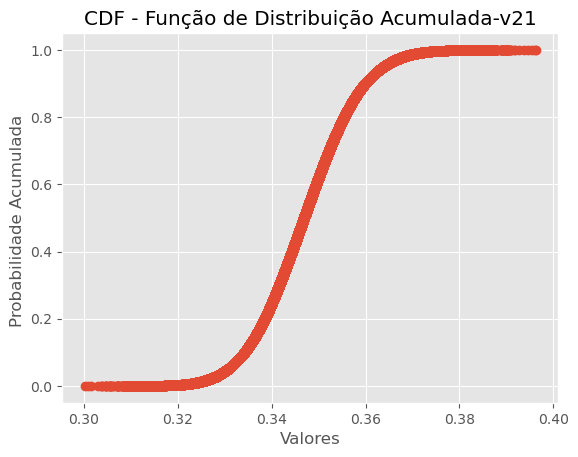

0    0.039565
dtype: float64


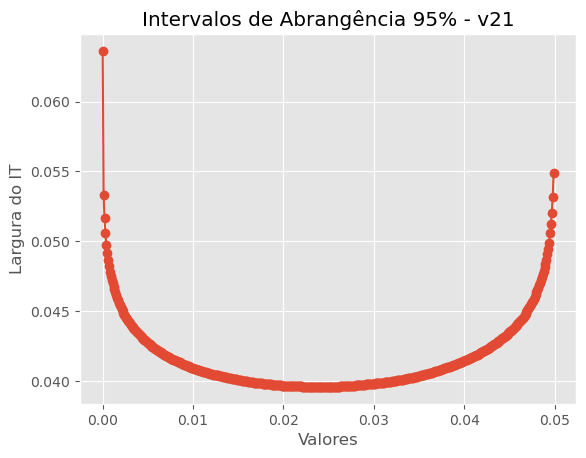

In [392]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v21')
plt.grid(True)
plt.show()

minvalue_IT21 = res.min()
print(minvalue_IT21)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v21')
plt.grid(True)
plt.show()

In [393]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_21= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_21= inverse_cdf(percentile2)
print(ymin_21)
print(ymax_21)

0.32729607820510864
0.36686140298843384


# simulação mc v22 

In [395]:
i=22
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC22=np.std(previsão)
MMC22=np.mean(previsão)

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 16s 523us/step


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

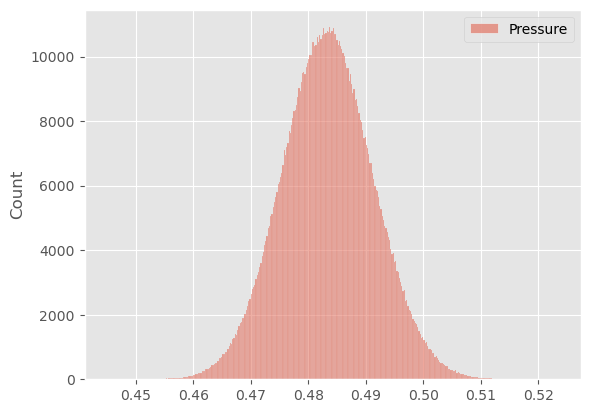

In [396]:
sns.histplot(previsão,)

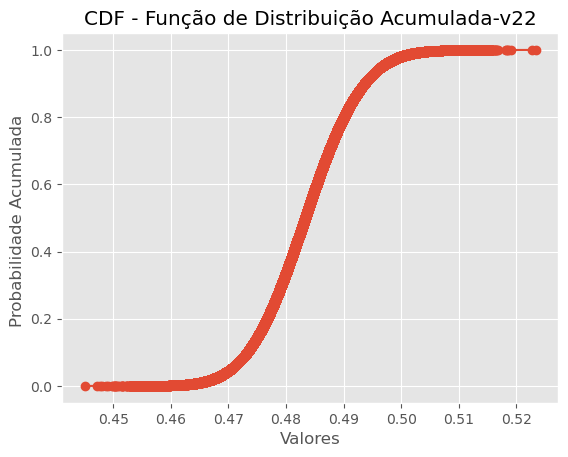

0    0.031217
dtype: float64


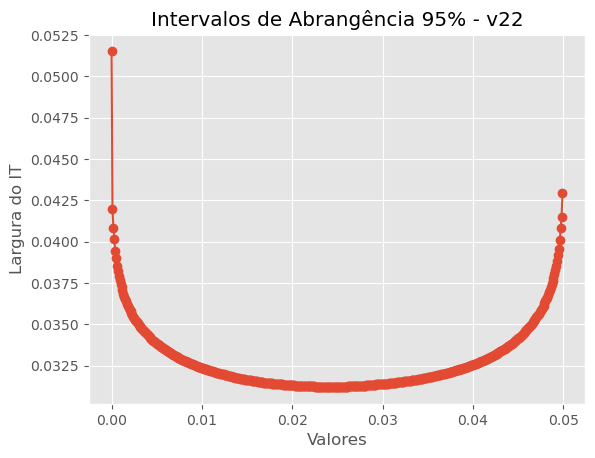

In [397]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v22')
plt.grid(True)
plt.show()

minvalue_IT22 = res.min()
print(minvalue_IT22)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v22')
plt.grid(True)
plt.show()

In [398]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_22= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_22= inverse_cdf(percentile2)
print(ymin_22)
print(ymax_22)

0.4679037630558014
0.49912068247795105


# simulação mc v23

In [400]:
i=23
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC23=np.std(previsão)
MMC23=np.mean(previsão)

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 17s 549us/step


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

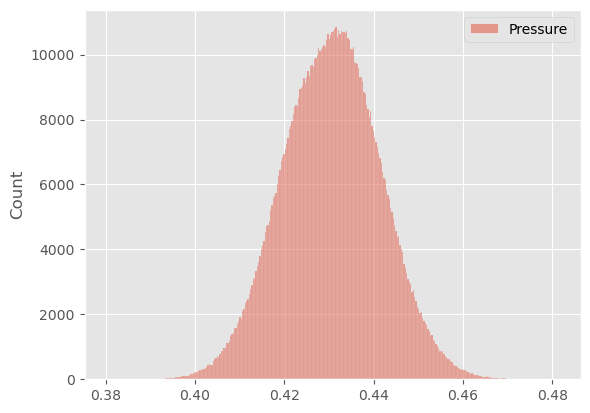

In [401]:
sns.histplot(previsão,)

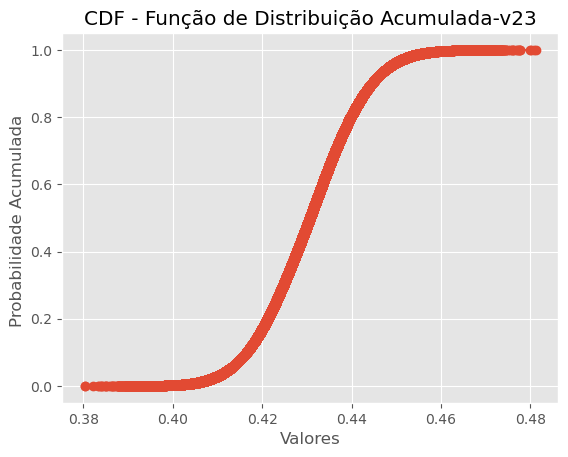

0    0.042677
dtype: float64


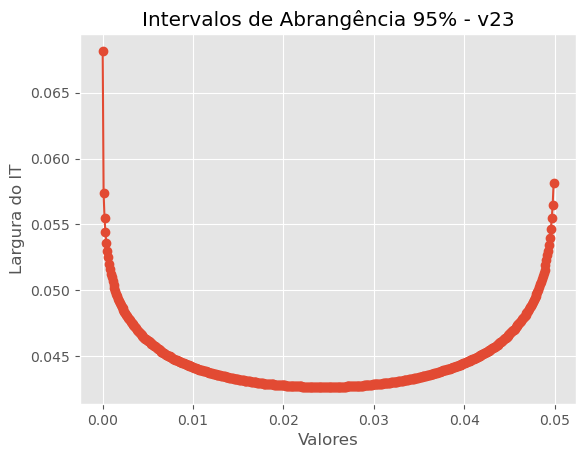

In [402]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v23')
plt.grid(True)
plt.show()

minvalue_IT23 = res.min()
print(minvalue_IT23)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v23')
plt.grid(True)
plt.show()

In [403]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_23= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_23= inverse_cdf(percentile2)
print(ymin_23)
print(ymax_23)

0.4092247784137726
0.45190134644508356


# simulação mc v24

In [405]:
i=24
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC24=np.std(previsão)
MMC24=np.mean(previsão)

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 17s 532us/step


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

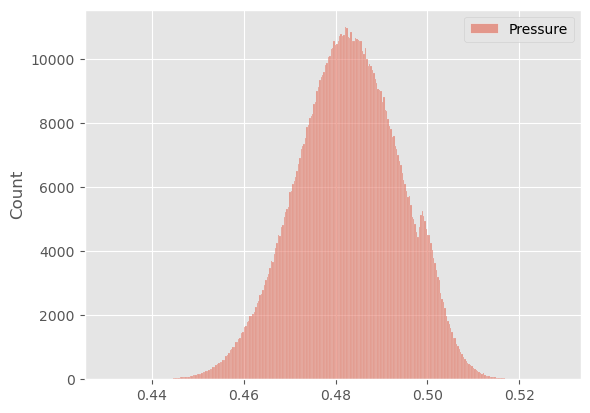

In [406]:
sns.histplot(previsão,)

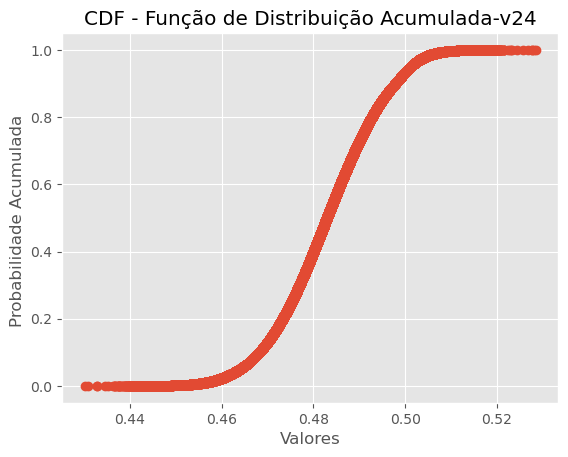

0    0.043114
dtype: float64


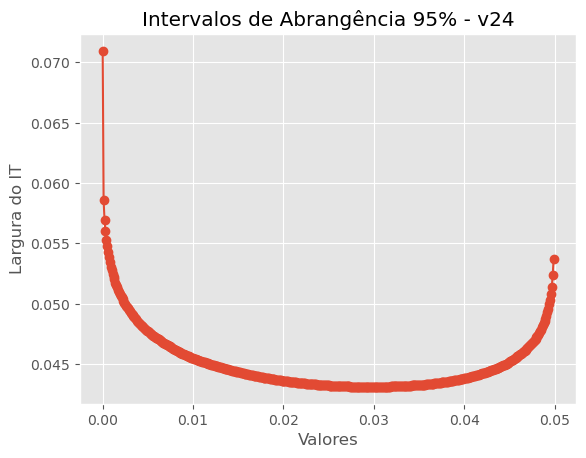

In [407]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v24')
plt.grid(True)
plt.show()

minvalue_IT24 = res.min()
print(minvalue_IT24)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v24')
plt.grid(True)
plt.show()

In [408]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_24= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_24= inverse_cdf(percentile2)
print(ymin_24)
print(ymax_24)

0.4612206816673279
0.504334568977356


# simulação mc v25

In [410]:
i=25
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC25=np.std(previsão)
MMC25=np.mean(previsão)

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 17s 544us/step


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

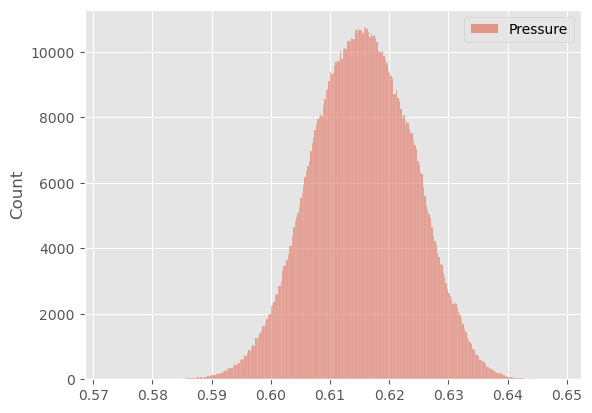

In [411]:
sns.histplot(previsão,)

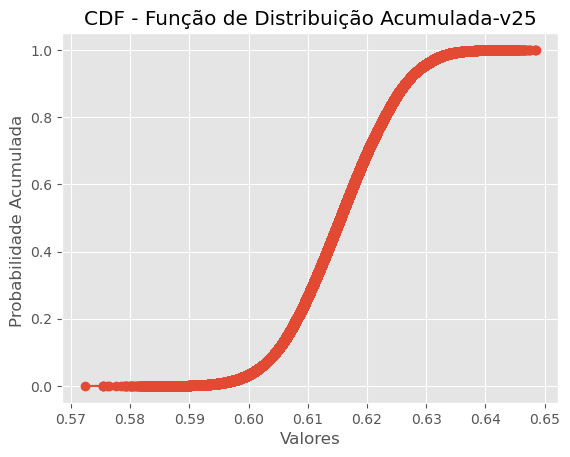

0    0.03277
dtype: float64


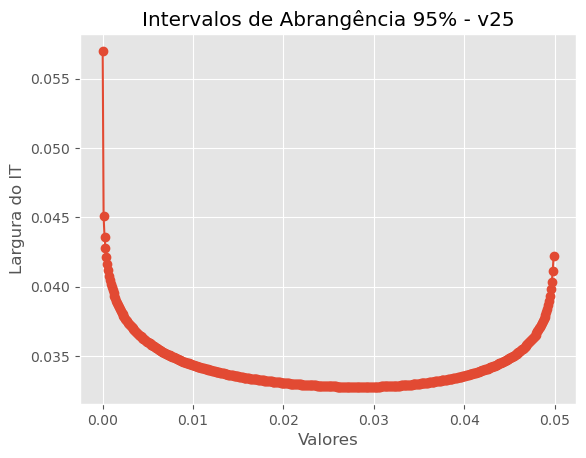

In [412]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v25')
plt.grid(True)
plt.show()

minvalue_IT25 = res.min()
print(minvalue_IT25)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v25')
plt.grid(True)
plt.show()

In [413]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_25= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_25= inverse_cdf(percentile2)
print(ymin_25)
print(ymax_25)

0.5993219614028931
0.6320915818214417


# simulação mc v26

In [415]:
i=26
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC26=np.std(previsão)
MMC26=np.mean(previsão)

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 17s 546us/step


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

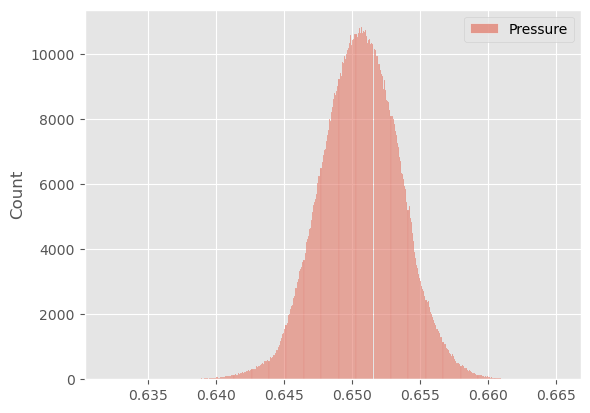

In [416]:
sns.histplot(previsão,)

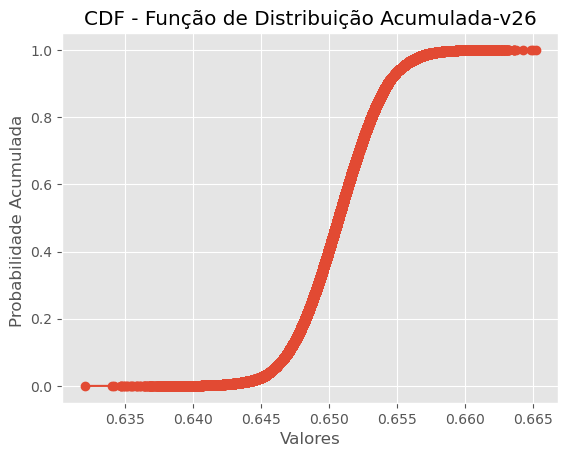

0    0.011404
dtype: float64


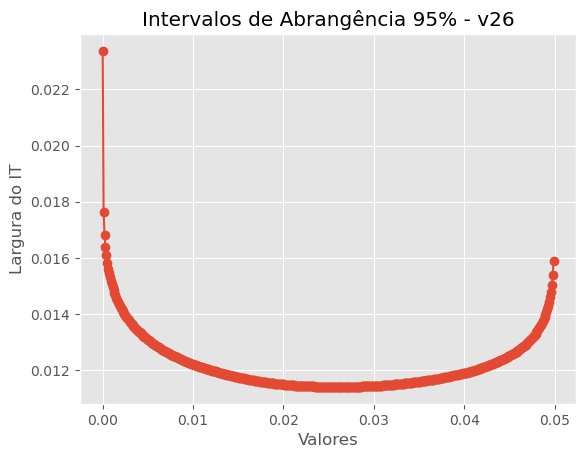

In [417]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v26')
plt.grid(True)
plt.show()

minvalue_IT26 = res.min()
print(minvalue_IT26)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v26')
plt.grid(True)
plt.show()

In [418]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_26= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_26= inverse_cdf(percentile2)
print(ymin_26)
print(ymax_26)

0.645032525062561
0.6564362049102783


# simulação mc v27

In [420]:
i=27
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC27=np.std(previsão)
MMC27=np.mean(previsão)

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 17s 537us/step


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

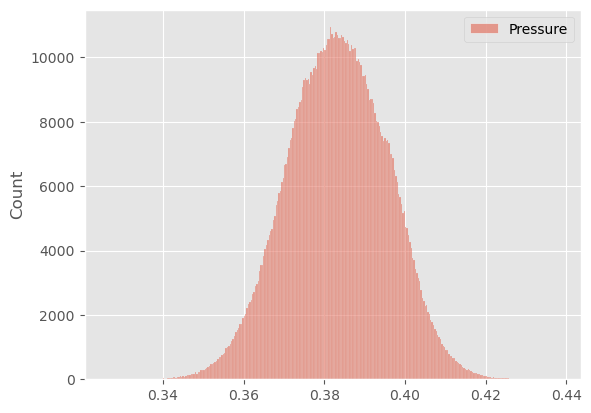

In [421]:
sns.histplot(previsão,)

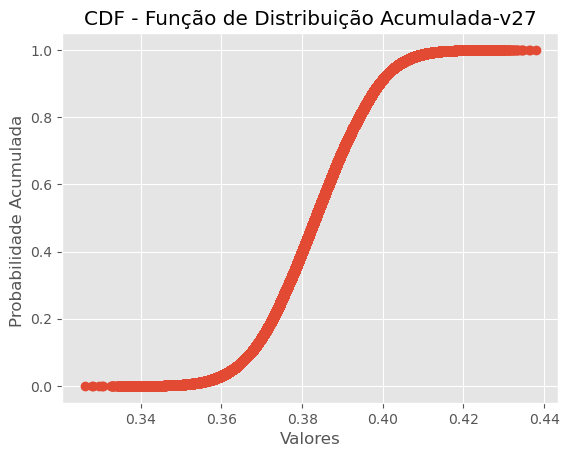

0    0.047787
dtype: float64


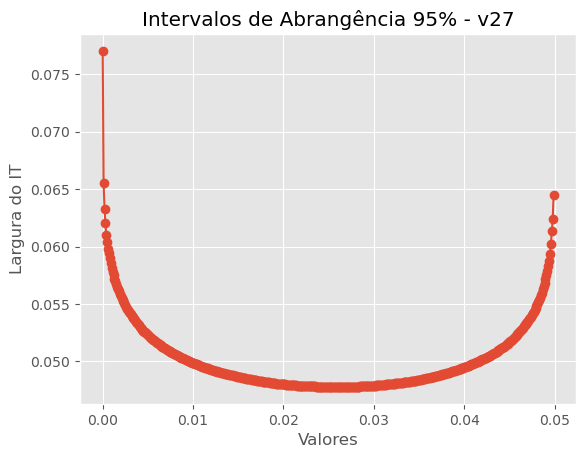

In [422]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v27')
plt.grid(True)
plt.show()

minvalue_IT27 = res.min()
print(minvalue_IT27)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v27')
plt.grid(True)
plt.show()

In [423]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_27= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_27= inverse_cdf(percentile2)
print(ymin_27)
print(ymax_27)

0.3593616485595703
0.4071485996246338


# simulação mc v28

In [425]:
i=28
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC28=np.std(previsão)
MMC28=np.mean(previsão)

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 17s 533us/step


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

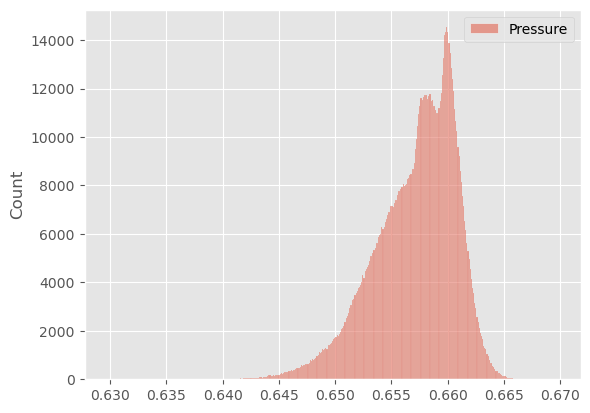

In [426]:
sns.histplot(previsão,)

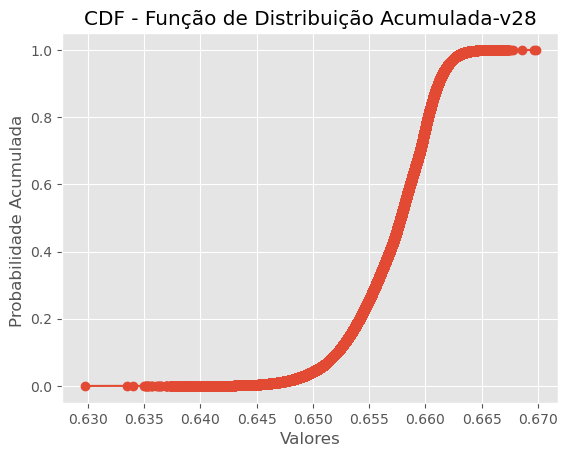

0    0.013418
dtype: float64


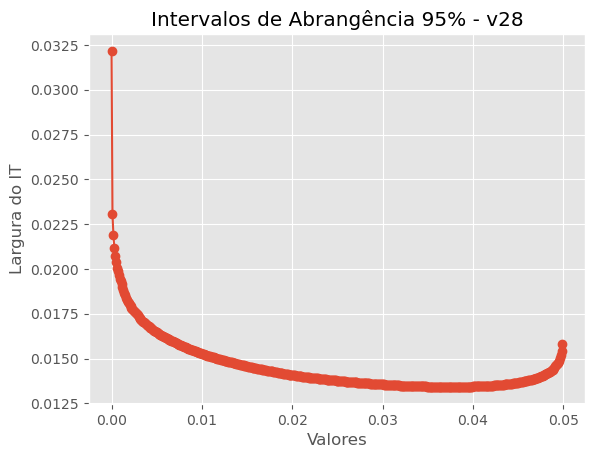

In [427]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v28')
plt.grid(True)
plt.show()

minvalue_IT28 = res.min()
print(minvalue_IT28)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v28')
plt.grid(True)
plt.show()

In [428]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_28= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_28= inverse_cdf(percentile2)
print(ymin_28)
print(ymax_28)

0.6497678160667419
0.6631853580474854


# simulação mc v29

In [430]:
i=29
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC29=np.std(previsão)
MMC29=np.mean(previsão)

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 17s 536us/step


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

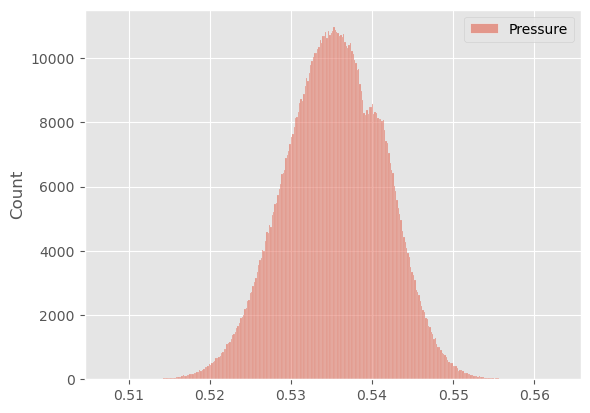

In [431]:
sns.histplot(previsão,)

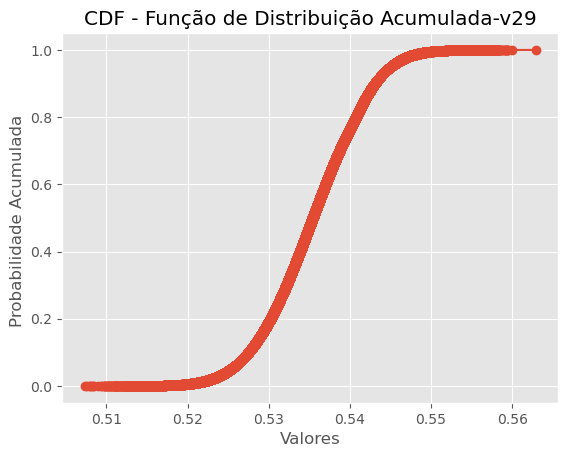

0    0.023214
dtype: float64


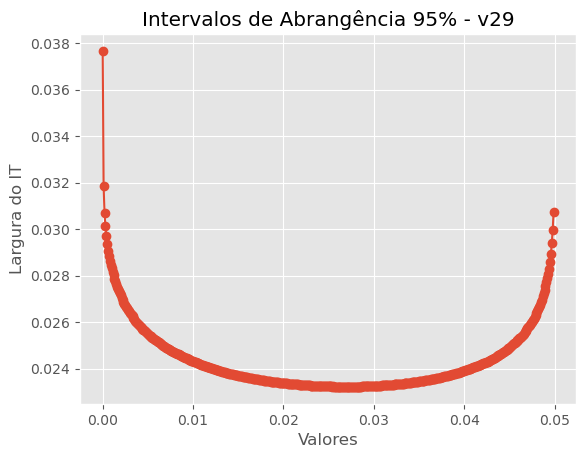

In [432]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v29')
plt.grid(True)
plt.show()

minvalue_IT29 = res.min()
print(minvalue_IT29)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v29')
plt.grid(True)
plt.show()

In [433]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_29= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_29= inverse_cdf(percentile2)
print(ymin_29)
print(ymax_29)

0.5236784815788269
0.5468928217887878


# simulação mc v30

In [435]:
i=30
# Defina a média e a matriz de covariância da distribuição multivariada
mean = [X_test.iloc[i,0], X_test.iloc[i,1],X_test.iloc[i,2], X_test.iloc[i,3], X_test.iloc[i,4]]  # Média dos valores em cada dimensão
cov_matrix = [[upx1**2,        upx1*upx2*r_12,   upx1*upx3*r_13, upx1*upx4*r_14,   upx1*upx5*r_15],
              [upx2*upx1*r_21, upx2**2,          upx2*upx3*r_23, upx2*upx4*r_24,   upx2*upx5*r_25],
              [upx3*upx1*r_31, upx3*upx2*r_32,   upx3**2,        upx3*upx4*r_34,   upx3*upx5*r_35],
              [upx4*upx1*r_41, upx4*upx2*r_42,   upx4*upx3*r_43, upx4**2,          upx4*upx5*r_45],
              [upx5*upx1*r_51, upx5*upx2*r_52,   upx5*upx3*r_53, upx5*upx4*r_54,   upx5**2]] #Matriz de covariância através da relação com a correlação

# Defina o tamanho da amostra desejada
sample_size = 1000000
# Gere números aleatórios em uma distribuição multivariada
random_samples = np.random.multivariate_normal(mean, cov_matrix, sample_size)
random_samples=pd.DataFrame(random_samples)
x_1 =pd.DataFrame(random_samples[0])
x_2 =pd.DataFrame(random_samples[1])
x_3 =pd.DataFrame(random_samples[2])
x_4 =pd.DataFrame(random_samples[3])
x_5 =pd.DataFrame(random_samples[4])

x_teste=pd.concat([x_1,x_2,x_3,x_4,x_5],axis=1)
x_teste=pd.DataFrame(x_teste)
previsão=model.predict(x_teste)
previsão=pd.DataFrame(previsão)
nomes_colunas = ['Frequency','Angle','Length','Velocity','Suction Side']
nomes_colunas2 = ['Pressure']
previsão.columns=nomes_colunas2
x_teste.columns = nomes_colunas
UMC30=np.std(previsão)
MMC30=np.mean(previsão)

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 17s 528us/step


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


C:\Users\AdmPDI\Documents\Conda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

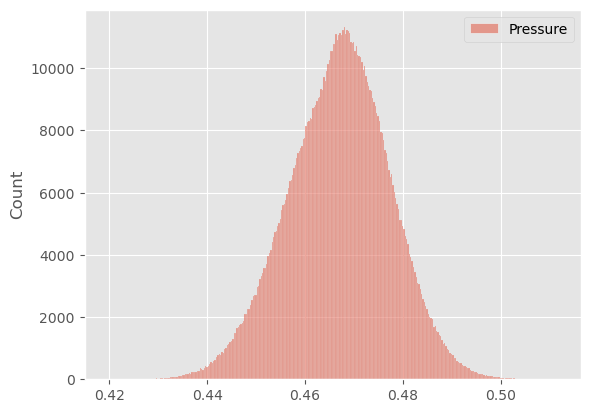

In [436]:
sns.histplot(previsão,)

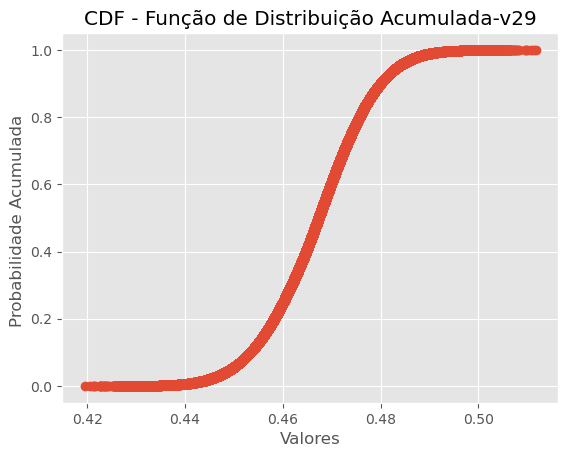

0    0.040778
dtype: float64


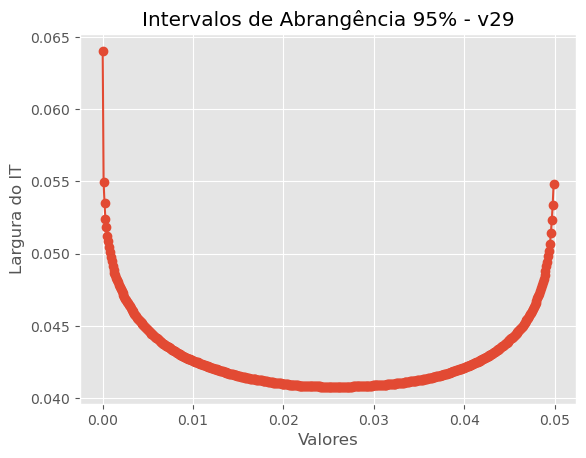

In [437]:
# Exemplo de conjunto de dados (pode ser substituído pelos seus próprios dados)
dados = previsão['Pressure']
dados = sorted(dados)
# Calcula a CDF dos dados
cdf = np.cumsum(np.ones_like(dados)) / len(dados)
p=np.arange(0,0.05,0.0001)
x = [] 
for index, element in enumerate(p):
    x.append(element)
res=pd.DataFrame(x) 
def IT(p):
    resultado = dados[np.argmax(cdf >= p+0.95)]-dados[np.argmax(cdf >= p)]
    return resultado
res[0] = res[0].apply(IT)

# Plota a CDF
plt.plot(dados, cdf, marker='o')
plt.xlabel('Valores')
plt.ylabel('Probabilidade Acumulada ')
plt.title('CDF - Função de Distribuição Acumulada-v29')
plt.grid(True)
plt.show()

minvalue_IT30 = res.min()
print(minvalue_IT30)
plt.plot(x, res, marker='o')
plt.xlabel('Valores')
plt.ylabel('Largura do IT')
plt.title('Intervalos de Abrangência 95% - v29')
plt.grid(True)
plt.show()

In [438]:
res_df=pd.DataFrame(res)
res_df[0].idxmpmin=0.005
pmin=x[res_df[0].idxmin()]

inverse_cdf = interp1d(cdf, dados, kind='linear', fill_value='extrapolate')

percentile1 = pmin
ymin_30= inverse_cdf(percentile1)
percentile2 = pmin+0.95
ymax_30= inverse_cdf(percentile2)
print(ymin_30)
print(ymax_30)

0.4460667669773102
0.4868450164794922


In [439]:
UMC=[UMC0,UMC1,UMC2,UMC3,UMC4,UMC5,UMC6,UMC7,UMC8,UMC9,UMC10,UMC11,UMC12,UMC13,UMC14,UMC15,UMC16,UMC17,UMC18,UMC19,UMC20,UMC21,UMC22,UMC23,
     UMC24,UMC25,UMC26,UMC27,UMC28,UMC29,UMC30]

In [440]:
MMC=[MMC0,MMC1,MMC2,MMC3,MMC4,MMC5,MMC6,MMC7,MMC8,MMC9,MMC10,MMC11,MMC12,MMC13,MMC14,MMC15,MMC16,MMC17,MMC18,MMC19,MMC20,MMC21,MMC22,MMC23,
     MMC24,MMC25,MMC26,MMC27,MMC28,MMC29,MMC30]

In [441]:
YMIN=[ymin_0,ymin_1,ymin_2,ymin_3,ymin_4,ymin_5,ymin_6,ymin_7,ymin_8,ymin_9,ymin_10,ymin_11,ymin_12,ymin_13,ymin_14,ymin_15,ymin_16,ymin_17,ymin_18,ymin_19,ymin_20,ymin_21,ymin_22,ymin_23,ymin_24,ymin_25,ymin_26,ymin_27,ymin_28,ymin_29,ymin_30,]

In [442]:
YMAX=[ymax_0,ymax_1,ymax_2,ymax_3,ymax_4,ymax_5,ymax_6,ymax_7,ymax_8,ymax_9,ymax_10,ymax_11,ymax_12,ymax_13,ymax_14,ymax_15,ymax_16,ymax_17,ymax_18,ymax_19,ymax_20,ymax_21,ymax_22,ymax_23,ymax_24,ymax_25,ymax_26,ymax_27,ymax_28,ymax_29,ymax_30,]

In [443]:
UMC=pd.DataFrame(UMC)

In [444]:
MMC=pd.DataFrame(MMC)

In [445]:
YMIN=pd.DataFrame(YMIN)

In [446]:
YMIN

,0
0,0.597423
1,0.616351
2,0.675013
3,0.310660
4,0.590081
5,0.620664
6,0.359610
7,0.627996
8,0.545881
9,0.579964


In [447]:
YMAX=pd.DataFrame(YMAX)

In [448]:
YMAX

,0
0,0.605584
1,0.635020
2,0.688251
3,0.334776
4,0.611355
5,0.630849
6,0.406300
7,0.643309
8,0.577630
9,0.605341


In [449]:
#MCCC=pd.concat([df.total[5],df.total['Predict'],MMC,UMC,2*df.total['ucca'],df.total['ucce'],df.total['ucc'],df.total['U']],axis=1)

In [450]:
df.total['Predict']

0     0.600798
1     0.624799
2     0.681603
3     0.322092
4     0.602696
5     0.625735
6     0.382396
7     0.635474
8     0.562691
9     0.592846
10    0.568385
11    0.635115
12    0.629249
13    0.682332
14    0.633432
15    0.687651
16    0.635449
17    0.447721
18    0.414615
19    0.571539
20    0.401657
21    0.346861
22    0.483319
23    0.430700
24    0.482945
25    0.615510
26    0.650666
27    0.383287
28    0.657791
29    0.535436
30    0.467338
Name: Predict, dtype: float32

In [451]:
2*df.total['ucca']

0     0.007541
1     0.009704
2     0.007468
3     0.014144
4     0.009971
5     0.007169
6     0.024743
7     0.007256
8     0.021435
9     0.015745
10    0.018727
11    0.007360
12    0.005157
13    0.007640
14    0.012796
15    0.007633
16    0.007362
17    0.015466
18    0.018582
19    0.004051
20    0.024511
21    0.022972
22    0.015518
23    0.022948
24    0.022932
25    0.018762
26    0.005259
27    0.025838
28    0.007252
29    0.012761
30    0.020078
Name: ucca, dtype: float32

In [452]:
#df.total['c1']=(df.total['Predict Deltax1']-df.total['Predict'])/h1

In [453]:
MCCC=pd.concat([df.total['Predict'],2*df.total['ucca'],YMIN,YMAX],axis=1)

In [454]:
# Definir os nomes das colunas
nomes_colunas = ['y','Up','y_inf','y_max']

# Atribuir os nomes das colunas ao DataFrame
MCCC.columns = nomes_colunas



In [455]:
MCCC

,y,Up,y_inf,y_max
0,0.600798,0.007541,0.597423,0.605584
1,0.624799,0.009704,0.616351,0.635020
2,0.681603,0.007468,0.675013,0.688251
3,0.322092,0.014144,0.310660,0.334776
4,0.602696,0.009971,0.590081,0.611355
5,0.625735,0.007169,0.620664,0.630849
6,0.382396,0.024743,0.359610,0.406300
7,0.635474,0.007256,0.627996,0.643309
8,0.562691,0.021435,0.545881,0.577630
9,0.592846,0.015745,0.579964,0.605341


In [456]:
MCCC['d_inf']=abs(MCCC['y']-MCCC['Up']-MCCC['y_inf'])

In [457]:
MCCC['d_sup']=abs(MCCC['y']+MCCC['Up']-MCCC['y_max'])

In [458]:
MCCC['tolerance_l']=0.005

In [459]:
# Definir os nomes das colunas
nomes_colunas = ['y','Up','y_inf','y_max','d_inf','d_sup','Tolerance']

# Atribuir os nomes das colunas ao DataFrame
MCCC.columns = nomes_colunas



In [50]:
pip install pygwalker

Note: you may need to restart the kernel to use updated packages.


In [52]:
import pygwalker as pyg

In [54]:
pyg.walk(MCCC)

Box(children=(HTML(value='<div id="ifr-pyg-00061b65933b0b1cLYrHmQPATOxtkNV9" style="height: auto">\n    <head>…

In [463]:
#MCCC.to_excel('MCCC.xlsx')

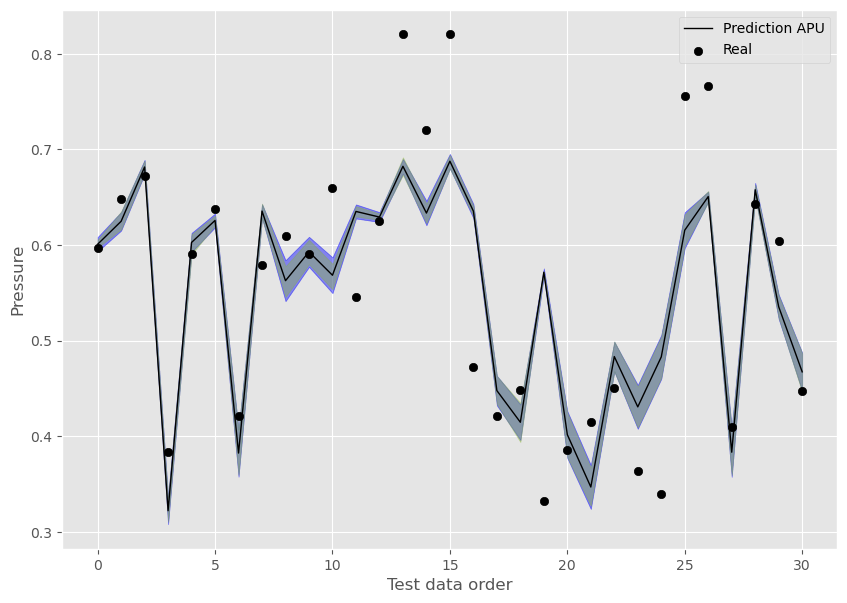

In [464]:
n = 31
t = range(n) 

plt.style.use("ggplot")
f = plt.figure(figsize=(10,7))
plt.plot(t, MCCC['y'], label='Prediction APU', color="Black", lw=1)

for shade in range(1, 5):
    plt.fill_between(t, MCCC['y']-MCCC['Up'],  MCCC['y']+MCCC['Up'], alpha=0.13, color="blue")
for shade in range(1, 5):
    plt.fill_between(t, MCCC['y_inf'],  MCCC['y_max'], alpha=0.12, color="C5")
   
plt.scatter(t, df.total[5], color="black", label="Real")
plt.ylabel("Pressure")
plt.xlabel("Test data order")
plt.legend(loc="best")
f.savefig("rnn_demanda_test6.pdf")
plt.show()

In [465]:
MCCC

,y,Up,y_inf,y_max,d_inf,d_sup,Tolerance
0,0.600798,0.007541,0.597423,0.605584,0.004166,0.002755,0.005
1,0.624799,0.009704,0.616351,0.635020,0.001256,0.000517,0.005
2,0.681603,0.007468,0.675013,0.688251,0.000878,0.000820,0.005
3,0.322092,0.014144,0.310660,0.334776,0.002712,0.001460,0.005
4,0.602696,0.009971,0.590081,0.611355,0.002644,0.001311,0.005
5,0.625735,0.007169,0.620664,0.630849,0.002097,0.002055,0.005
6,0.382396,0.024743,0.359610,0.406300,0.001957,0.000840,0.005
7,0.635474,0.007256,0.627996,0.643309,0.000222,0.000579,0.005
8,0.562691,0.021435,0.545881,0.577630,0.004624,0.006496,0.005
9,0.592846,0.015745,0.579964,0.605341,0.002863,0.003250,0.005


In [466]:
MCCC.to_excel('MCCC.xlsx')